#### IMPORTS

In [2]:
from sklearn.linear_model import  LogisticRegression 
from sklearn.model_selection import train_test_split, RepeatedKFold, RepeatedStratifiedKFold, StratifiedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, GaussianNB
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification


import time
import numpy as np
#!pip install imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import numpy as np
from numpy import *
from numpy import mean
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
os.getcwd()

import time
import warnings 
warnings.filterwarnings('ignore')
#%load_ext autotime

In [3]:
full_df = pd.read_csv('heart_2020.csv')
full_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
full_df.describe(include = 'all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [5]:
#Converting dependent variable into binary codes
full_df["HeartDisease"] = pd.Categorical(full_df["HeartDisease"]).codes
full_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,0,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,0,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


# 1.1 Exploratory Data Analysis

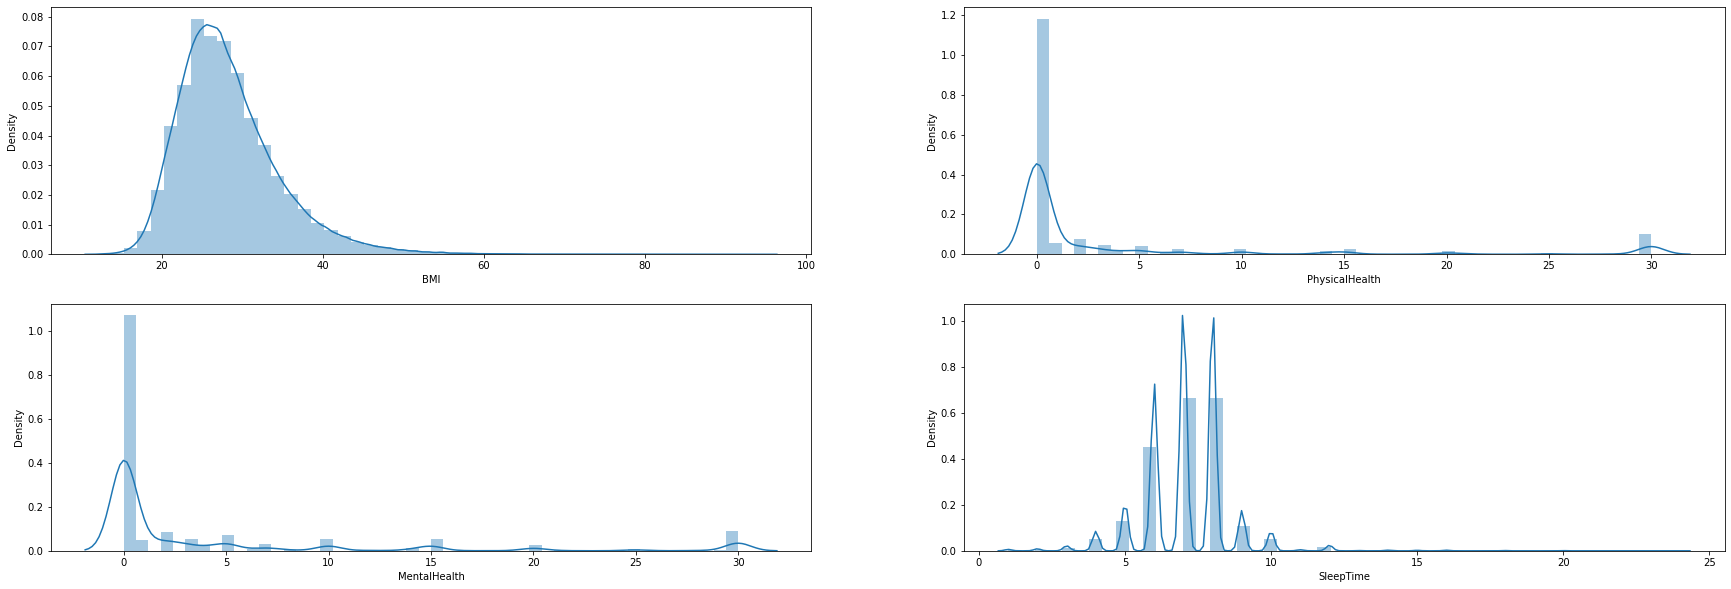

In [6]:
#visualizing numeric features

plt.figure(figsize = (30, 10))
plt.subplot(221)
sns.distplot(full_df['BMI'])
plt.subplot(222)
sns.distplot(full_df['PhysicalHealth'])
plt.subplot(223)
sns.distplot(full_df['MentalHealth'])
plt.subplot(224)
sns.distplot(full_df['SleepTime'])


plt.show()

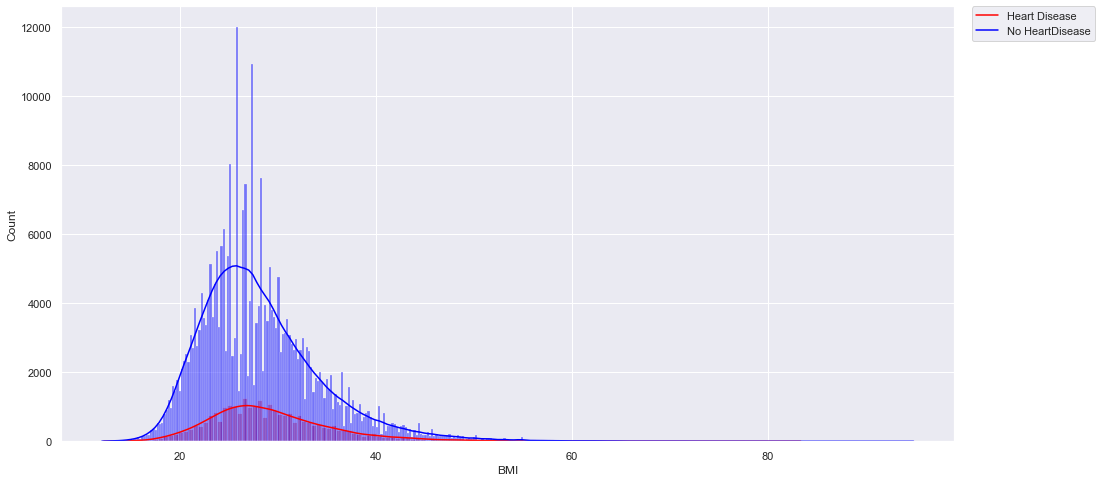

In [9]:
sns.set(rc={'figure.figsize':(16,8)})

sns.histplot(full_df[full_df['HeartDisease']==1], x="BMI", kde=True, color = 'red')
sns.histplot(full_df[full_df['HeartDisease']==0], x="BMI", kde=True, color = 'blue')
 


plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

#### People with Heart Disease are found to have a higher BMI than people with no Heart Disease

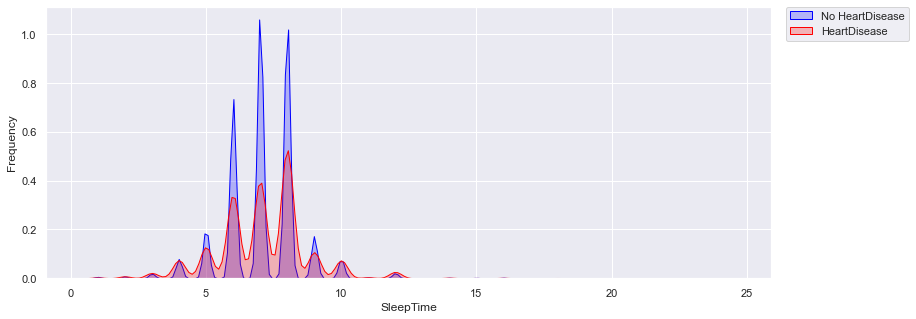

In [10]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(full_df[full_df['HeartDisease']==0]["SleepTime"],shade = True, color="blue", label="No HeartDisease", ax = ax)
sns.kdeplot(full_df[full_df['HeartDisease']==1]["SleepTime"],shade = True, color="red", label="HeartDisease", ax = ax)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

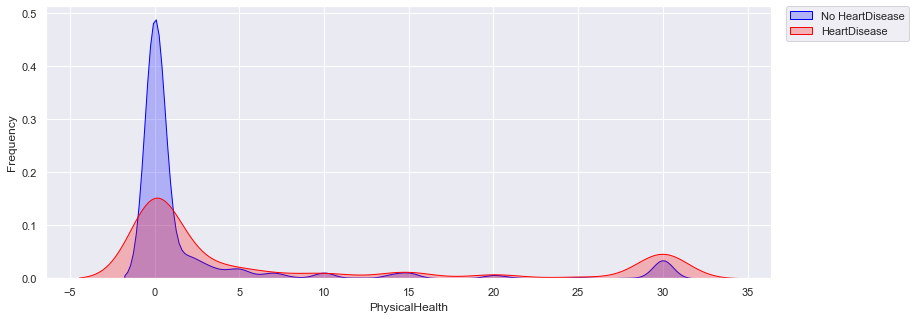

In [12]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(full_df[full_df['HeartDisease']==0]["PhysicalHealth"],shade = True, color="blue", label="No HeartDisease", ax = ax)
sns.kdeplot(full_df[full_df['HeartDisease']==1]["PhysicalHealth"],shade = True, color="red", label="HeartDisease", ax = ax)
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

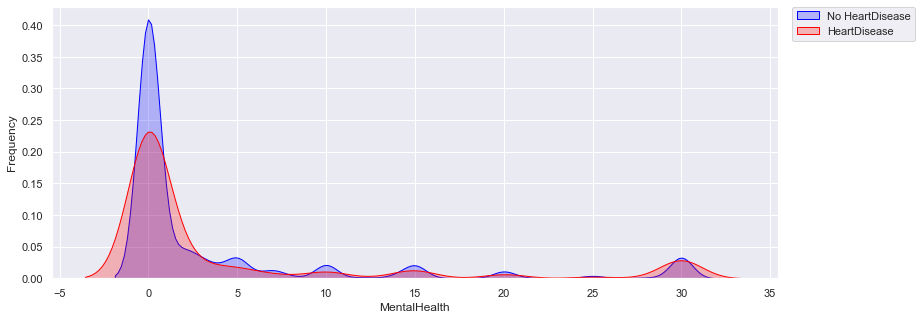

In [13]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(full_df[full_df['HeartDisease']==0]["MentalHealth"],shade = True, color="blue", label="No HeartDisease", ax = ax)
sns.kdeplot(full_df[full_df['HeartDisease']==1]["MentalHealth"],shade = True, color="red", label="HeartDisease", ax = ax)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

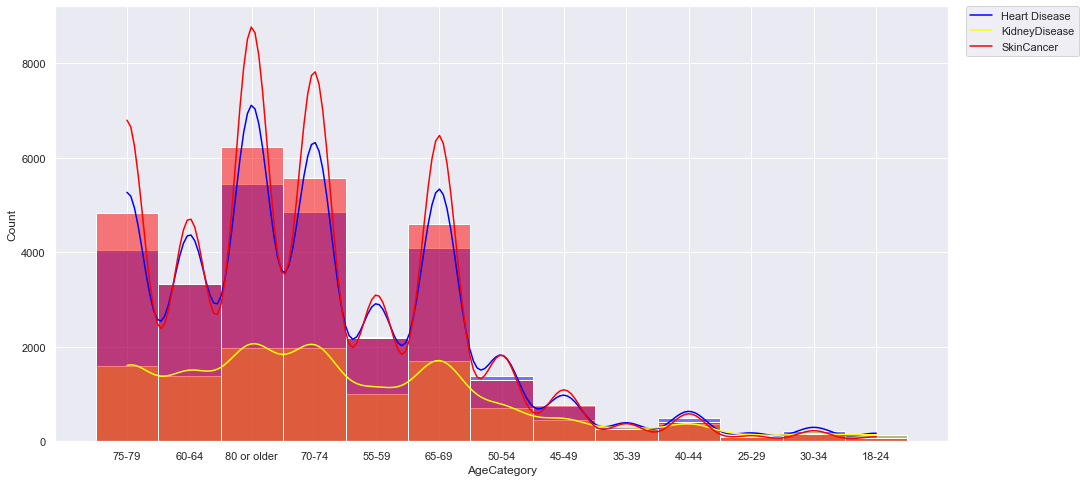

In [23]:
sns.set(rc={'figure.figsize':(16,8)})

sns.histplot(full_df[full_df['HeartDisease']== 1], x="AgeCategory", kde=True, color = 'blue')
sns.histplot(full_df[full_df['KidneyDisease']=='Yes'], x="AgeCategory", kde=True, color = 'yellow')
sns.histplot(full_df[full_df['SkinCancer']=='Yes'], x="AgeCategory", kde=True, color = 'red') 


plt.legend(title='', loc=2, labels=['Heart Disease', 'KidneyDisease', 'SkinCancer' ],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

#### There is a common pattern: as age groups increase the occurence of skin cancer, heart disease, and kidney disease increase
#### Majority of the records in our dataset have age over 60

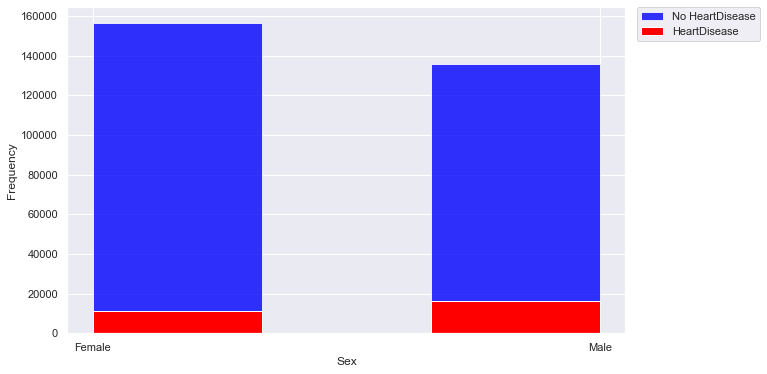

In [11]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(full_df[full_df['HeartDisease']==0]["Sex"], bins=3, alpha=0.8, color="blue", label="No HeartDisease")
ax.hist(full_df[full_df['HeartDisease']==1]["Sex"], bins=3, alpha=1, color="red", label="HeartDisease")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [17]:
HeartDisease_male = full_df[(full_df['HeartDisease'] == 1) & (full_df['Sex'] == 'Male')]['Sex'].count()
HeartDisease_female = full_df[(full_df['HeartDisease'] == 1) & (full_df['Sex'] == 'Female')]['Sex'].count()
tot_male = full_df[(full_df['Sex'] == 'Male')]['Sex'].count()
tot_female = full_df[(full_df['Sex'] == 'Female')]['Sex'].count()
Prob_HeartDisease_Males = HeartDisease_male / tot_male
Prob_HeartDisease_Females = HeartDisease_female / tot_female
print('Probability of Heart Diseases in Males:',Prob_HeartDisease_Males)
print('Probability of Heart Diseases in Females:',Prob_HeartDisease_Females)

Probability of Heart Diseases in Males: 0.10618461740904007
Probability of Heart Diseases in Females: 0.06694675367241738


#### 1. More heart disease patients are Males than Females
#### 2. There are more Females in the dataset than Males
#### 3. The probability of Males having heart disease is higher than Females

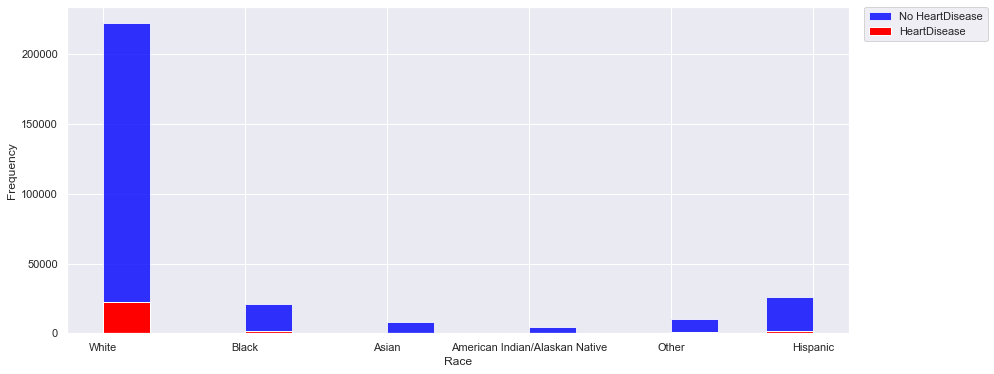

In [18]:
fig, ax = plt.subplots(figsize = (14,6))

ax.hist(full_df[full_df['HeartDisease']==0]["Race"], bins=15, alpha=0.8, color="blue", label="No HeartDisease")
ax.hist(full_df[full_df['HeartDisease']==1]["Race"], bins=15, alpha=1, color="red", label="HeartDisease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

#### Majority of the people in this dataset are White, also having the most Heart Diseases. 

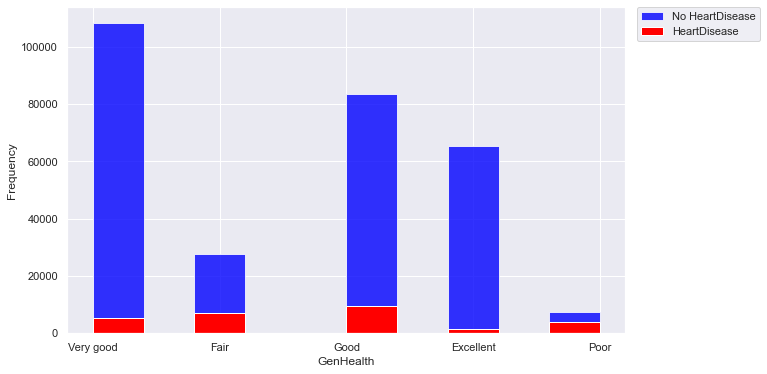

In [19]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(full_df[full_df['HeartDisease']==0]["GenHealth"], bins=10, alpha=0.8, color="blue", label="No HeartDisease")
ax.hist(full_df[full_df['HeartDisease']==1]["GenHealth"], bins=10, alpha=1, color="red", label="HeartDisease")

ax.set_xlabel("GenHealth")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

#### Majority of the records in our dataset have good, very good, and excellent General Health

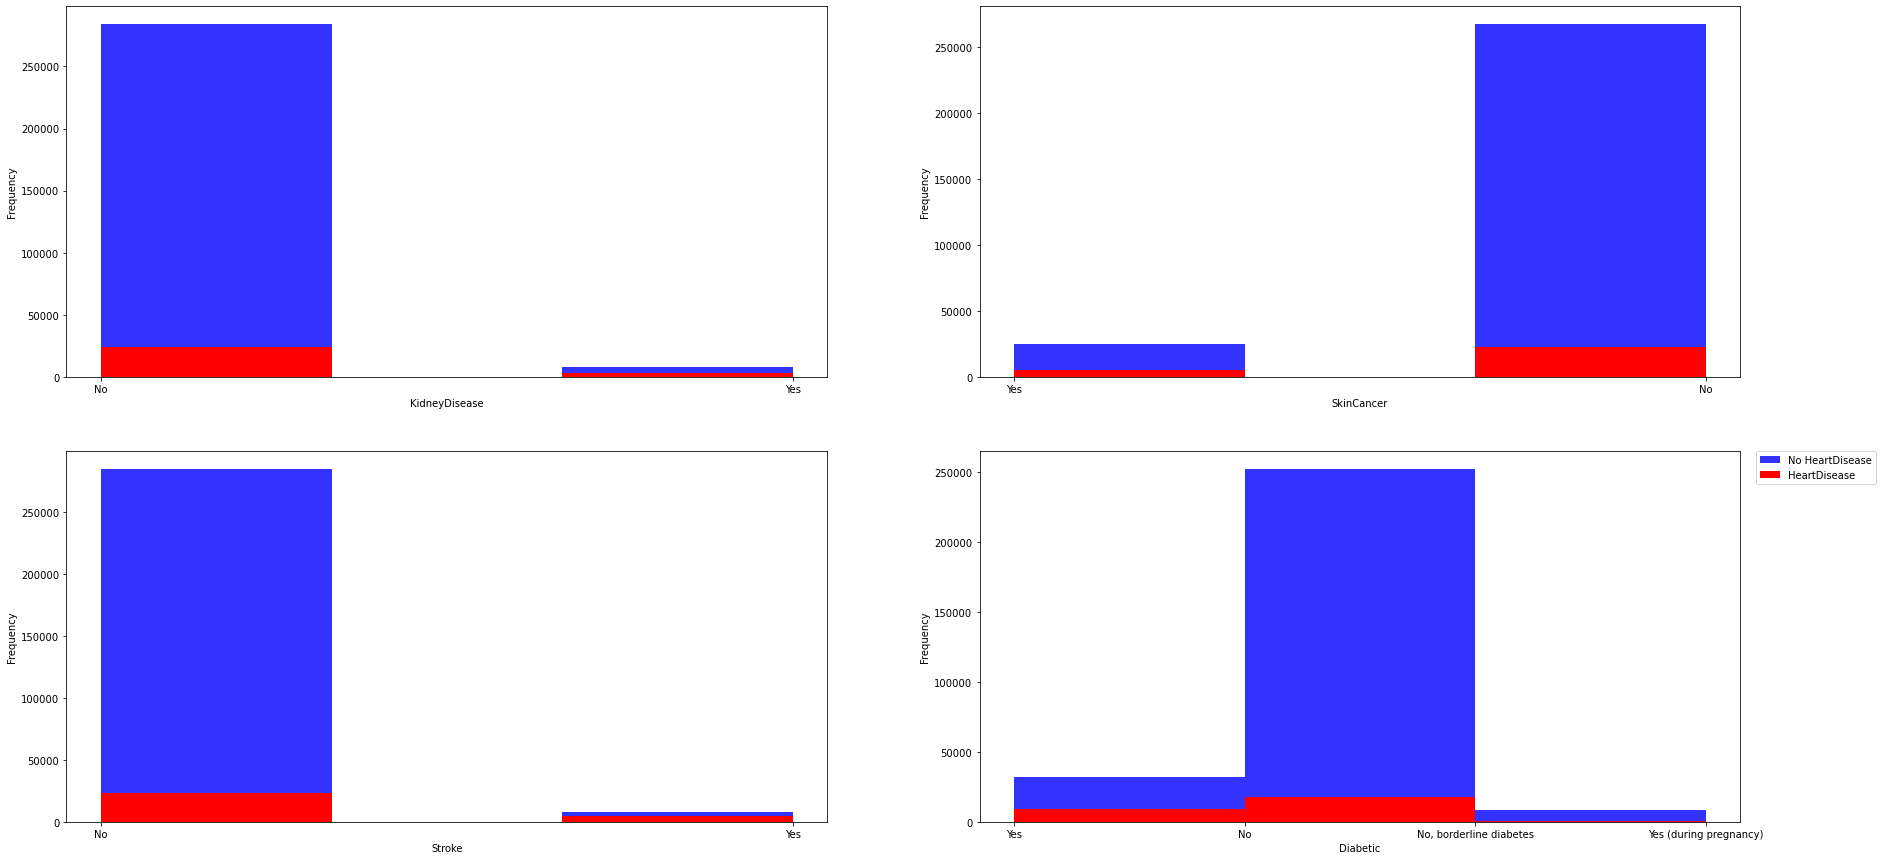

In [7]:
plt.figure(figsize = (30,15))
ax1 = plt.subplot(221)
ax1.hist(full_df[full_df['HeartDisease']==0]["KidneyDisease"], bins=3, alpha=0.8, color="blue", label="No HeartDisease")
ax1.hist(full_df[full_df['HeartDisease']==1]["KidneyDisease"], bins=3, alpha=1, color="red", label="HeartDisease")
ax1.set_xlabel("KidneyDisease")
ax1.set_ylabel("Frequency")

ax2 = plt.subplot(222)
ax2.hist(full_df[full_df['HeartDisease']==0]["SkinCancer"], bins=3, alpha=0.8, color="blue", label="No HeartDisease")
ax2.hist(full_df[full_df['HeartDisease']==1]["SkinCancer"], bins=3, alpha=1, color="red", label="HeartDisease")
ax2.set_xlabel("SkinCancer")
ax2.set_ylabel("Frequency")


ax3 = plt.subplot(223)
ax3.hist(full_df[full_df['HeartDisease']==0]["Stroke"], bins=3, alpha=0.8, color="blue", label="No HeartDisease")
ax3.hist(full_df[full_df['HeartDisease']==1]["Stroke"], bins=3, alpha=1, color="red", label="HeartDisease")
ax3.set_xlabel("Stroke")
ax3.set_ylabel("Frequency")

ax4 = plt.subplot(224)
ax4.hist(full_df[full_df['HeartDisease']==0]["Diabetic"], bins=3, alpha=0.8, color="blue", label="No HeartDisease")
ax4.hist(full_df[full_df['HeartDisease']==1]["Diabetic"], bins=3, alpha=1, color="red", label="HeartDisease")
ax4.set_xlabel("Diabetic")
ax4.set_ylabel("Frequency")

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

#### 1. Most of the people tested have no kidney disease
#### 2. Majority of the records don't have skin cancer
#### 3. Majority of the records in our dataset had no stroke
#### 4. Most of the people tested are not diabetic

# 1.2 Pre-Processing

In [4]:
full_df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

time: 109 ms (started: 2022-05-06 19:29:25 +05:00)


##### There are no Null values in any columns so that saves us some pre-processing

### 1.2.1 Scaling

In [25]:
X_full = full_df.drop(columns = ['HeartDisease'])
y_full = full_df[['HeartDisease']]
x_onehot_full = pd.get_dummies(X_full, drop_first = True)
scaler = MinMaxScaler()
scaler.fit(x_onehot_full)
x_scaled_full = scaler.transform(x_onehot_full)
x_scaled_full = pd.DataFrame(x_scaled_full, columns = x_onehot_full.columns)
x_scaled_full

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0.055294,0.100000,1.0,0.173913,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.100447,0.000000,0.0,0.260870,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.175782,0.666667,1.0,0.304348,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.147169,0.000000,0.0,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.141132,0.933333,0.0,0.304348,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.185802,0.233333,0.0,0.217391,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
319791,0.215139,0.000000,0.0,0.173913,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
319792,0.147531,0.000000,0.0,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
319793,0.250996,0.000000,0.0,0.478261,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
percentage_no = ((len(y_full)-y_full.value_counts()[0])/len(y_full))*100
percentage_no

8.559545959130068

time: 0 ns (started: 2022-05-07 18:24:03 +05:00)


##### As can be seen, the dataset is highly imbalanced as only 8.66% of the data belongs to "Yes" class which means choosing AUC-ROC as our metric would be better for this type of data.

# 1.3 Base Cases


Now lets estabilish a base case with which we can compare rest of the algorithms and pre-processing techniques. For base case, we will use:
1) One-hot encoded and scaled dataset 

2) No variables will be removed

3) Naive Bayes Multinomial method will be used 

4) Repeated kfold will be used to get an accurate ROC-AUC

In [29]:
cv = RepeatedKFold(n_splits=10, n_repeats=3)
mnb = MultinomialNB()
start = time.perf_counter()
scores = cross_val_score(mnb, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 1)
  
score = format(np.mean(scores), '.4f')
print(score)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8110


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    7.8s finished


##### Now, AUC-ROC is 0.811 which is the standard now, we will try to improve this value further by trying different algorithms and feature selection techniques

Now lets start with using base algorithms to construct an ROC curve:

In [30]:
def fitting_model(model, name):
    model.fit(trainX, trainy)
    model_probs = model.predict_proba(testX)[:, 1]
#     model_probs = [:, 1]
    model_auc = roc_auc_score(testy, model_probs)
    print(name, ': ', model_auc)
    model_falsepr, model_truepr, _ = roc_curve(testy, model_probs)
    plt.plot(model_falsepr, model_truepr, marker = 'x', label = name)
    
    
def convert_categorical(df1):
    df_q = pd.DataFrame()
    label_encoder = LabelEncoder()
    for col in df1:
        if col not in ['Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth', 'Asthma','KidneyDisease','SkinCancer']:
            df_q[col] = pd.qcut(df1[col], 4, duplicates='drop')            
            df_q[col]= label_encoder.fit_transform(df_q[col])
            df_q[col] = df_q[col].astype('str')

    X_cat = df1[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]
    df_cat = pd.concat([df_q,X_cat],axis=1)
    return df_cat


def mixed_NaiveBayes(df1):
    nb_gaussian = GaussianNB()
    nb_categorical = CategoricalNB()

    df_n = pd.DataFrame()
    for col in df1:
        if col in ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']:
            df_n[col] = df1[col]  
            y = df1[['HeartDisease']]

    trainX, testX, trainy, testy = train_test_split(df_n, y, test_size=0.3, random_state=0)

    nb_gaussian.fit(trainX,trainy)

    gaussian_probs_train = nb_gaussian.predict_proba(trainX)
    gaussian_probs_train = gaussian_probs_train[:,1]

    gaussian_probs_test = nb_gaussian.predict_proba(testX)
    gaussian_probs_test = gaussian_probs_test[:,1]

    df_c = pd.DataFrame()  
    for col in df1:
        if col in ['Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth', 'Asthma','KidneyDisease','SkinCancer']:
            df_c[col] = df1[col]  
            df_c_onehot = pd.get_dummies(df_c, drop_first= True)
    trainX, testX, trainy, testy = train_test_split(df_c_onehot, y, test_size=0.3, random_state=0)  
    nb_categorical.fit(trainX,trainy)

    c_probs_train = nb_categorical.predict_proba(trainX)
    c_probs_train = c_probs_train[:,1]

    c_probs_test = nb_categorical.predict_proba(testX)
    c_probs_test = c_probs_test[:,1]
    
    #print(len(g_probs_train))
    trainX = np.c_[gaussian_probs_train,c_probs_train] 
    trainX = pd.DataFrame(trainX, columns = ['Gaussian','Categorical'])
   

    testX = np.c_[gaussian_probs_test,c_probs_test] 
    testX = pd.DataFrame(testX, columns = ['Gaussian','Categorical'])

    return(trainX, testX, trainy,  testy)

### 1.3.1 ROC Curve for Base Cases

Decision Tree Classifier :  0.5894598701263546
Logistic Regression :  0.8425175174397801
K-Nearest Neighbors Classifier :  0.7965147645389932
Random Forest Classifier :  0.7927662047566297
Gradient Boosting Classifier :  0.842780081189149
Naive Bayes Categorical :  0.6554937087559329
Gaussian Naive Bayes :  0.6448090660213189
Mixed Naive Bayes with Gaussian NB :  0.8054204712886888
Mixed Naive Bayes with Decision Tree Classifier :  0.5781006255183023


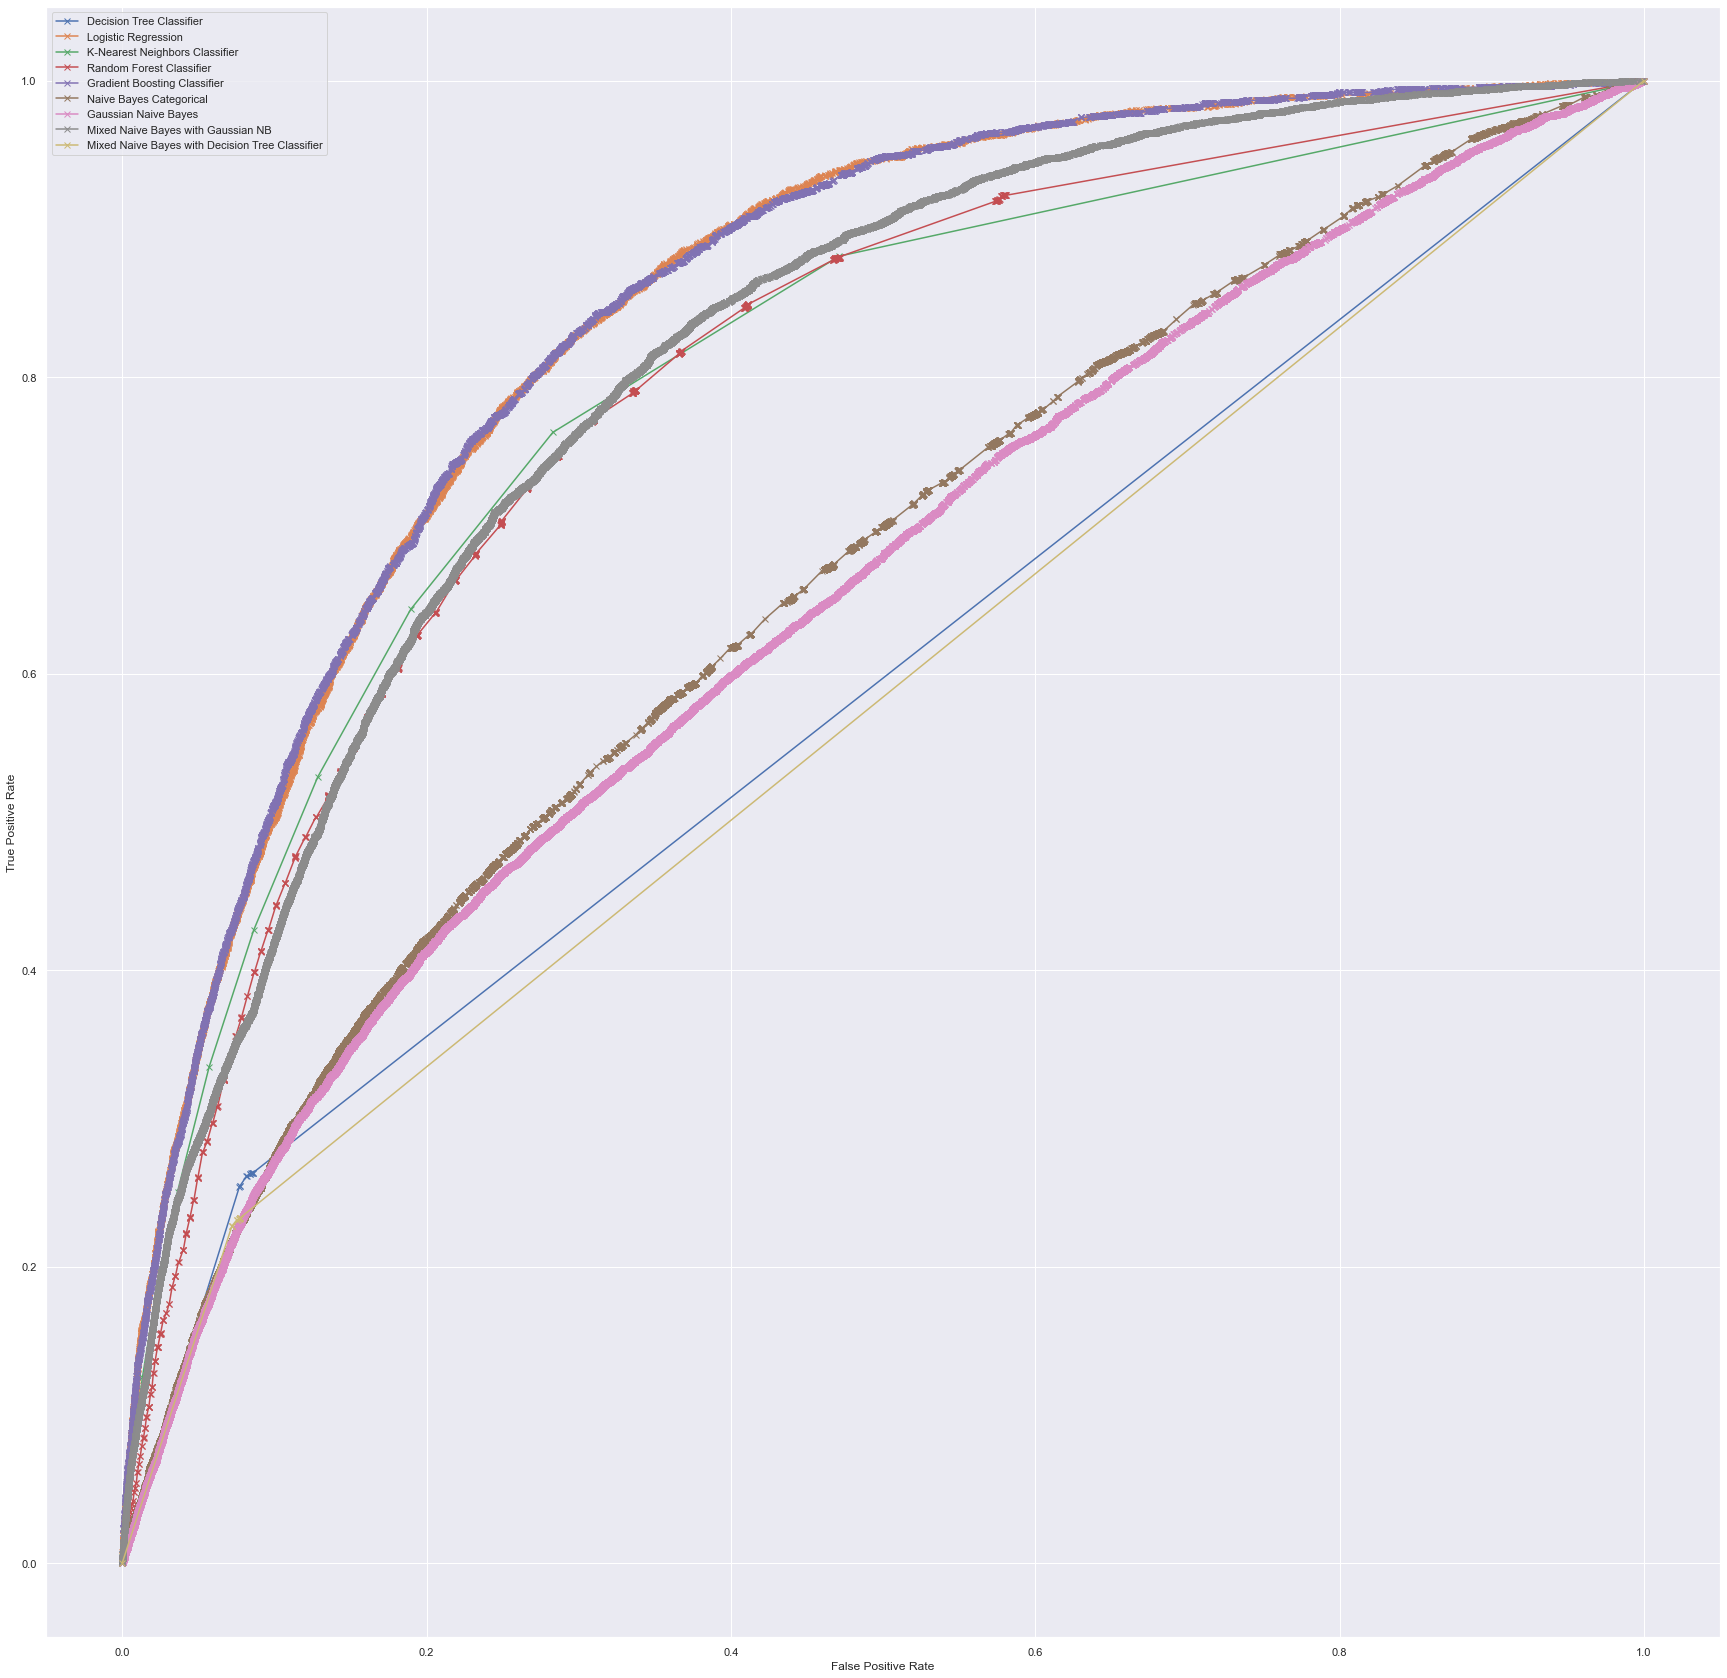

time: 4min 36s (started: 2022-05-02 07:42:35 +05:00)


In [104]:
trainX, testX, trainy, testy = train_test_split(x_scaled_full, y_full, test_size=0.3, random_state=2)

dt = DecisionTreeClassifier()
fitting_model(dt, 'Decision Tree Classifier')

lr = LogisticRegression()
fitting_model(lr, 'Logistic Regression')

knn = KNeighborsClassifier(n_neighbors = 20, n_jobs = -1)
fitting_model(knn, 'K-Nearest Neighbors Classifier')

rf = RandomForestClassifier()
fitting_model(rf, 'Random Forest Classifier')

gb = GradientBoostingClassifier()
fitting_model(gb, 'Gradient Boosting Classifier')

x_categorical = convert_categorical(full_df)
x_categorical_dummies = pd.get_dummies(x_categorical, drop_first = True)
trainX, testX, trainy, testy = train_test_split(x_categorical, y_full , test_size = 0.3, random_state =2)
nb_categorical = CategoricalNB()
fitting_model(nb_categorical, 'Naive Bayes Categorical')

nb_gaussian = GaussianNB()
x_nb_gaussian = x_scaled_full[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]
fitting_model(nb_gaussian, 'Gaussian Naive Bayes')

trainX, testX, trainy, testy = mixed_NaiveBayes(full_df)
nb_mix_gauss = GaussianNB()
fitting_model(nb_mix_gauss, 'Mixed Naive Bayes with Gaussian NB')

nb_mix_dt = DecisionTreeClassifier()
fitting_model(nb_mix_dt, 'Mixed Naive Bayes with Decision Tree Classifier')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### Insight:
Now that we have identified all the base cases for each algorithm and estimated which algorithms are expected to generally perform better. We will now try to vary the parameters of Tree-based algorithms and K-Nearest Neighbors. Currently, Gradient Boosting Classifier seems to be our best estimate yet based on a rough estimate due to 70-30 split with ROC-AUC of 0.8425 ! However, its highly likely that the values would change if its run again.

# 2. FINDING THE BEST MODEL (WITHOUT SMOTE)

## 2.1.  Model: KNN Classifier

### 2.1.1. Testing KNN N_Neighbors (10-1000) on Full Scaled Dataset

First lets start with K-nearest neighbors and find out the best K-value, lets start with K between 10 - 1000:

In [110]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 15, n_jobs = -1)
scores = cross_val_score(knn, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = -1)
  
score = format(np.mean(scores), '.4f')
print(score)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed: 19.6min remaining: 45.7min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed: 19.6min remaining:  8.4min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 19.7min finished


0.7848
time: 19min 41s (started: 2022-05-02 08:00:34 +05:00)


In [111]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 50, n_jobs = -1)
scores = cross_val_score(knn,x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 10)
  
score = format(np.mean(scores), '.4f')
print(score)


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed: 18.7min remaining: 43.6min
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed: 18.7min remaining:  8.0min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed: 18.8min finished


0.8203
time: 18min 48s (started: 2022-05-02 08:20:16 +05:00)


In [112]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 75, n_jobs = -1)
scores = cross_val_score(knn, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 10)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed: 18.6min remaining: 43.4min
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed: 18.7min remaining:  8.0min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed: 18.7min finished


0.8257
time: 18min 45s (started: 2022-05-02 08:39:04 +05:00)


In [113]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 150, n_jobs = -1)
scores = cross_val_score(knn, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 10)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed: 18.7min remaining: 43.7min
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed: 18.8min remaining:  8.1min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed: 18.8min finished


0.8311
time: 18min 50s (started: 2022-05-02 08:57:49 +05:00)


##### Since each algo was taking 20+ mins, we will sample the dataset and take 35% to do the analysis

### 2.1.2. Testing KNN N_Neighbors on Sample Scaled Dataset

In [9]:
subset_df = full_df.sample(frac = 0.35)
subset_df.shape

(111928, 18)

time: 62 ms (started: 2022-05-06 04:18:20 +05:00)


In [10]:
subset_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
241307,0,21.29,Yes,No,No,2.0,30.0,No,Female,55-59,White,No,Yes,Very good,6.0,No,No,No
303716,0,30.85,Yes,No,No,0.0,0.0,No,Male,30-34,White,No,Yes,Very good,6.0,No,No,No
307347,0,17.28,No,No,No,0.0,0.0,No,Male,50-54,White,No,Yes,Excellent,5.0,No,No,No
284699,0,45.70,Yes,No,No,0.0,0.0,No,Male,60-64,White,No,No,Fair,6.0,No,No,No
49763,0,33.07,No,No,No,0.0,0.0,No,Female,80 or older,White,Yes,Yes,Good,6.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25940,0,31.46,Yes,No,No,0.0,0.0,No,Male,70-74,White,No,Yes,Very good,7.0,No,No,No
203659,0,40.01,No,No,Yes,0.0,0.0,No,Male,55-59,White,No,No,Excellent,8.0,No,No,No
279891,0,24.56,No,No,No,0.0,20.0,No,Female,65-69,White,No,No,Good,5.0,No,No,No
98427,0,26.88,Yes,No,No,0.0,0.0,No,Male,40-44,Black,No,Yes,Good,6.0,No,No,No


time: 47 ms (started: 2022-05-06 04:18:20 +05:00)


In [11]:
#scaling on subset dataset
X = subset_df.drop(columns = ['HeartDisease'])
y = subset_df[['HeartDisease']]
x_onehot = pd.get_dummies(X, drop_first = True)
scaler = MinMaxScaler()
scaler.fit(x_onehot)
x_scaled = scaler.transform(x_onehot)
x_scaled = pd.DataFrame(x_scaled, columns = x_onehot.columns)

time: 250 ms (started: 2022-05-06 04:18:21 +05:00)


In [12]:
percentage_no = ((len(y)-y.value_counts()[0])/len(y))*100
percentage_no

8.643056250446715

time: 15 ms (started: 2022-05-06 04:18:21 +05:00)


##### The sample was fair since the imbalanceness of the dataset remained the same

Now lets try to run a few KNN classification models  to find out the best K-value

In [145]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 250, n_jobs = -1)
scores = cross_val_score(knn, x_scaled , np.ravel(y), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 10)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:  2.6min remaining:  6.0min
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:  2.6min remaining:  1.1min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:  2.6min finished


0.8277
time: 2min 35s (started: 2022-05-02 18:03:39 +05:00)


In [146]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 350, n_jobs = -1)
scores = cross_val_score(knn, x_scaled , np.ravel(y), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 10)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:  2.6min remaining:  6.0min
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:  2.6min remaining:  1.1min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:  2.6min finished


0.8281
time: 2min 36s (started: 2022-05-02 18:06:15 +05:00)


In [147]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 500, n_jobs = -1)
scores = cross_val_score(knn, x_scaled , np.ravel(y), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 10)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:  2.7min remaining:  6.3min
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:  2.7min remaining:  1.2min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:  2.7min finished


0.8281
time: 2min 44s (started: 2022-05-02 18:08:52 +05:00)


### 2.1.3 GridSearchCV on N_Neighbors

In [150]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)

knn = KNeighborsClassifier(n_jobs = -1)
param_grid = {
     'n_neighbors': [20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360,380,400,450,500,750,1000]
}
grid_search = GridSearchCV(estimator = knn, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
0.8282753330143746
KNeighborsClassifier(n_jobs=-1, n_neighbors=400)
time: 1h (started: 2022-05-02 18:18:47 +05:00)


In [18]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)

knn = KNeighborsClassifier(n_jobs = -1)
param_grid = {
     'n_neighbors': [100,200,300,400]
}
grid_search = GridSearchCV(estimator = knn, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 3, scoring = 'f1')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
0.03917470539122653
KNeighborsClassifier(n_jobs=-1, n_neighbors=100)
time: 8min 14s (started: 2022-05-04 10:21:00 +05:00)


In [153]:
grid_search.cv_results_

{'mean_fit_time': array([0.14470303, 0.71580083, 0.25939929, 0.36909883, 0.34100103,
        0.30159285, 0.34529986, 0.2928009 , 0.33330162, 0.30319872,
        0.27940028, 0.44469855, 0.33099892, 0.39009931, 0.32489839,
        0.35029922, 0.41369743, 0.42059944, 0.34579716, 0.44300013,
        0.37390027, 0.43679271, 0.3642972 , 0.2885977 ]),
 'std_fit_time': array([0.03013338, 0.5893681 , 0.12979798, 0.09929894, 0.12752226,
        0.0697054 , 0.0985092 , 0.10389884, 0.10120823, 0.12585727,
        0.0853431 , 0.23705215, 0.08305975, 0.20969227, 0.21395331,
        0.09518092, 0.1600861 , 0.23495678, 0.14672984, 0.10454601,
        0.15269636, 0.1644713 , 0.13610338, 0.10648879]),
 'mean_score_time': array([255.77936039, 246.29101417, 241.24770381, 235.20969927,
        238.01809781, 237.64490366, 237.99859798, 236.30579875,
        236.29610012, 237.24140346, 241.43610108, 241.33639982,
        241.17109857, 242.0290005 , 240.80090404, 245.96329858,
        239.79659894, 243.274600

time: 31 ms (started: 2022-05-02 19:46:49 +05:00)


### 2.1.4. KNN Classifier on Full Dataset with StratifiedKFold

In [14]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 100, n_jobs = -1)
scores = cross_val_score(knn, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 10)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed: 18.5min remaining: 43.2min
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed: 18.6min remaining:  8.0min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed: 18.6min finished


0.8287
time: 18min 38s (started: 2022-05-03 00:31:49 +05:00)


In [46]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 350)
scores = cross_val_score(knn, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 2)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time= 3.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.3min remaining:    0.0s


[CV] END .................................................... total time= 3.1min
[CV] END .................................................... total time= 3.1min
[CV] END .................................................... total time= 3.2min
[CV] END .................................................... total time= 3.0min
[CV] END .................................................... total time= 3.0min
[CV] END .................................................... total time= 3.0min
[CV] END .................................................... total time= 3.0min
[CV] END .................................................... total time= 3.0min
[CV] END .................................................... total time= 2.9min
0.8327


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 30.5min finished


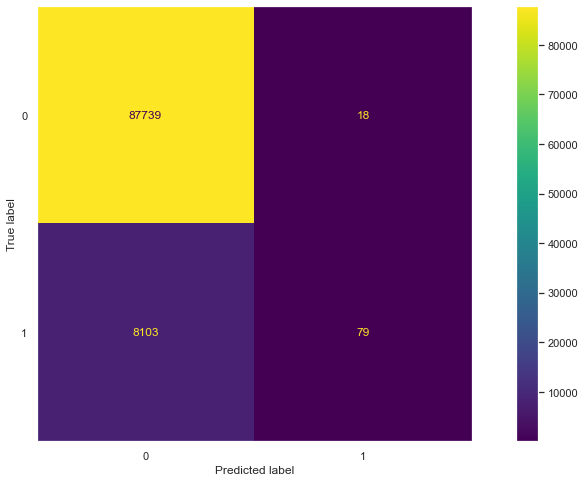

recall:  0.9655340992422391
precision:  81.44329896907216


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled_full, y_full, test_size = 0.3)
knn = KNeighborsClassifier(n_neighbors = 350)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
confusion = confusion_matrix(y_test, pred, labels = knn.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=knn.classes_)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

In [16]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 200)
scores = cross_val_score(knn, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.834) total time= 2.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV] END ................................ score: (test=0.837) total time= 2.2min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.5min remaining:    0.0s


[CV] END ................................ score: (test=0.834) total time= 2.2min
[CV] END ................................ score: (test=0.828) total time= 2.2min
[CV] END ................................ score: (test=0.833) total time= 2.2min
[CV] END ................................ score: (test=0.833) total time= 2.2min
[CV] END ................................ score: (test=0.826) total time= 2.2min
[CV] END ................................ score: (test=0.831) total time= 2.2min
[CV] END ................................ score: (test=0.828) total time= 2.2min
[CV] END ................................ score: (test=0.835) total time= 2.3min
0.8318
time: 22min 19s (started: 2022-05-03 02:24:01 +05:00)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 22.3min finished


In [17]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 220)
scores = cross_val_score(knn, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.833) total time= 2.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV] END ................................ score: (test=0.836) total time= 2.2min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.5min remaining:    0.0s


[CV] END ................................ score: (test=0.833) total time= 2.2min
[CV] END ................................ score: (test=0.828) total time= 2.3min
[CV] END ................................ score: (test=0.834) total time= 2.2min
[CV] END ................................ score: (test=0.833) total time= 2.2min
[CV] END ................................ score: (test=0.826) total time= 2.2min
[CV] END ................................ score: (test=0.831) total time= 2.2min
[CV] END ................................ score: (test=0.829) total time= 2.2min
[CV] END ................................ score: (test=0.835) total time= 2.2min
0.8319
time: 22min 21s (started: 2022-05-03 02:46:21 +05:00)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 22.4min finished


In [18]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 260)
scores = cross_val_score(knn, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.833) total time= 2.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV] END ................................ score: (test=0.836) total time= 2.2min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.5min remaining:    0.0s


[CV] END ................................ score: (test=0.833) total time= 2.2min
[CV] END ................................ score: (test=0.829) total time= 2.3min
[CV] END ................................ score: (test=0.834) total time= 2.2min
[CV] END ................................ score: (test=0.833) total time= 2.2min
[CV] END ................................ score: (test=0.827) total time= 2.2min
[CV] END ................................ score: (test=0.832) total time= 2.2min
[CV] END ................................ score: (test=0.829) total time= 2.2min
[CV] END ................................ score: (test=0.835) total time= 2.3min
0.8323
time: 22min 23s (started: 2022-05-03 03:08:43 +05:00)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 22.4min finished


In [19]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 300)
scores = cross_val_score(knn, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.833) total time= 2.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV] END ................................ score: (test=0.837) total time= 2.2min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.5min remaining:    0.0s


[CV] END ................................ score: (test=0.834) total time= 2.2min
[CV] END ................................ score: (test=0.829) total time= 2.3min
[CV] END ................................ score: (test=0.834) total time= 2.2min
[CV] END ................................ score: (test=0.834) total time= 2.3min
[CV] END ................................ score: (test=0.828) total time= 2.2min
[CV] END ................................ score: (test=0.832) total time= 2.2min
[CV] END ................................ score: (test=0.830) total time= 2.2min
[CV] END ................................ score: (test=0.836) total time= 2.2min
0.8326
time: 22min 23s (started: 2022-05-03 03:31:07 +05:00)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 22.4min finished


In [20]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 330)
scores = cross_val_score(knn, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.834) total time= 2.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV] END ................................ score: (test=0.837) total time= 2.2min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.5min remaining:    0.0s


[CV] END ................................ score: (test=0.834) total time= 2.2min
[CV] END ................................ score: (test=0.829) total time= 2.3min
[CV] END ................................ score: (test=0.834) total time= 2.2min
[CV] END ................................ score: (test=0.834) total time= 2.3min
[CV] END ................................ score: (test=0.828) total time= 2.2min
[CV] END ................................ score: (test=0.832) total time= 2.3min
[CV] END ................................ score: (test=0.830) total time= 2.2min
[CV] END ................................ score: (test=0.835) total time= 2.3min
0.8327
time: 22min 27s (started: 2022-05-03 03:53:30 +05:00)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 22.5min finished


In [21]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 360)
scores = cross_val_score(knn, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.834) total time= 2.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV] END ................................ score: (test=0.837) total time= 2.2min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.5min remaining:    0.0s


[CV] END ................................ score: (test=0.834) total time= 2.2min
[CV] END ................................ score: (test=0.829) total time= 2.4min
[CV] END ................................ score: (test=0.834) total time= 2.4min
[CV] END ................................ score: (test=0.833) total time= 2.3min
[CV] END ................................ score: (test=0.828) total time= 2.2min
[CV] END ................................ score: (test=0.832) total time= 2.2min
[CV] END ................................ score: (test=0.830) total time= 2.3min
[CV] END ................................ score: (test=0.835) total time= 2.2min
0.8327
time: 22min 59s (started: 2022-05-03 04:15:58 +05:00)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 23.0min finished


In [22]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 390)
scores = cross_val_score(knn, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.834) total time= 2.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV] END ................................ score: (test=0.838) total time= 2.2min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.5min remaining:    0.0s


[CV] END ................................ score: (test=0.833) total time= 2.2min
[CV] END ................................ score: (test=0.829) total time= 2.3min
[CV] END ................................ score: (test=0.834) total time= 2.2min
[CV] END ................................ score: (test=0.834) total time= 2.3min
[CV] END ................................ score: (test=0.828) total time= 2.2min
[CV] END ................................ score: (test=0.832) total time= 2.3min
[CV] END ................................ score: (test=0.830) total time= 2.2min
[CV] END ................................ score: (test=0.835) total time= 2.3min
0.8326
time: 22min 32s (started: 2022-05-03 04:38:58 +05:00)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 22.5min finished


In [23]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 380)
scores = cross_val_score(knn, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.834) total time= 2.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV] END ................................ score: (test=0.838) total time= 2.3min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.5min remaining:    0.0s


[CV] END ................................ score: (test=0.833) total time= 2.2min
[CV] END ................................ score: (test=0.829) total time= 2.3min
[CV] END ................................ score: (test=0.834) total time= 2.2min
[CV] END ................................ score: (test=0.833) total time= 2.3min
[CV] END ................................ score: (test=0.828) total time= 2.2min
[CV] END ................................ score: (test=0.832) total time= 2.4min
[CV] END ................................ score: (test=0.830) total time= 2.3min
[CV] END ................................ score: (test=0.835) total time= 2.3min
0.8326
time: 22min 48s (started: 2022-05-03 05:01:31 +05:00)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 22.8min finished


In [24]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 370)
scores = cross_val_score(knn, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.834) total time= 2.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV] END ................................ score: (test=0.838) total time= 2.3min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.6min remaining:    0.0s


[CV] END ................................ score: (test=0.834) total time= 2.3min
[CV] END ................................ score: (test=0.829) total time= 2.3min
[CV] END ................................ score: (test=0.834) total time= 2.3min
[CV] END ................................ score: (test=0.833) total time= 2.3min
[CV] END ................................ score: (test=0.828) total time= 2.3min
[CV] END ................................ score: (test=0.832) total time= 2.3min
[CV] END ................................ score: (test=0.830) total time= 2.3min
[CV] END ................................ score: (test=0.835) total time= 2.3min
0.8326
time: 23min 3s (started: 2022-05-03 05:24:19 +05:00)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 23.1min finished


In [25]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 375)
scores = cross_val_score(knn, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.834) total time= 2.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV] END ................................ score: (test=0.838) total time= 2.3min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.6min remaining:    0.0s


[CV] END ................................ score: (test=0.833) total time= 2.3min
[CV] END ................................ score: (test=0.829) total time= 2.3min
[CV] END ................................ score: (test=0.834) total time= 2.3min
[CV] END ................................ score: (test=0.833) total time= 2.3min
[CV] END ................................ score: (test=0.828) total time= 2.3min
[CV] END ................................ score: (test=0.832) total time= 2.3min
[CV] END ................................ score: (test=0.830) total time= 2.3min
[CV] END ................................ score: (test=0.835) total time= 2.3min
0.8326
time: 23min (started: 2022-05-03 05:47:23 +05:00)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 23.0min finished


In [26]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 365)
scores = cross_val_score(knn, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.834) total time= 2.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV] END ................................ score: (test=0.837) total time= 2.3min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.6min remaining:    0.0s


[CV] END ................................ score: (test=0.834) total time= 2.3min
[CV] END ................................ score: (test=0.829) total time= 2.3min
[CV] END ................................ score: (test=0.834) total time= 2.3min
[CV] END ................................ score: (test=0.833) total time= 2.3min
[CV] END ................................ score: (test=0.828) total time= 2.3min
[CV] END ................................ score: (test=0.832) total time= 2.3min
[CV] END ................................ score: (test=0.830) total time= 2.3min
[CV] END ................................ score: (test=0.835) total time= 2.3min
0.8327
time: 22min 59s (started: 2022-05-03 06:10:23 +05:00)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 23.0min finished


In [27]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 367)
scores = cross_val_score(knn, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.834) total time= 2.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV] END ................................ score: (test=0.838) total time= 2.3min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.6min remaining:    0.0s


[CV] END ................................ score: (test=0.834) total time= 2.3min
[CV] END ................................ score: (test=0.829) total time= 2.3min
[CV] END ................................ score: (test=0.834) total time= 2.3min
[CV] END ................................ score: (test=0.833) total time= 2.3min
[CV] END ................................ score: (test=0.828) total time= 2.3min
[CV] END ................................ score: (test=0.832) total time= 2.3min
[CV] END ................................ score: (test=0.830) total time= 2.3min
[CV] END ................................ score: (test=0.835) total time= 2.3min
0.8327
time: 23min (started: 2022-05-03 06:33:23 +05:00)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 23.0min finished


In [28]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 363)
scores = cross_val_score(knn, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.834) total time= 2.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV] END ................................ score: (test=0.838) total time= 2.3min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.6min remaining:    0.0s


[CV] END ................................ score: (test=0.834) total time= 2.3min
[CV] END ................................ score: (test=0.829) total time= 2.3min
[CV] END ................................ score: (test=0.834) total time= 2.3min
[CV] END ................................ score: (test=0.833) total time= 2.3min
[CV] END ................................ score: (test=0.828) total time= 2.3min
[CV] END ................................ score: (test=0.832) total time= 2.3min
[CV] END ................................ score: (test=0.830) total time= 2.3min
[CV] END ................................ score: (test=0.835) total time= 2.2min
0.8327
time: 22min 55s (started: 2022-05-03 06:56:24 +05:00)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 22.9min finished


## BEST KNN WITHOUT SMOTE

In [40]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 410)
scores = cross_val_score(knn, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.834) total time= 3.0min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min remaining:    0.0s


[CV] END ................................ score: (test=0.837) total time= 3.1min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.1min remaining:    0.0s


[CV] END ................................ score: (test=0.833) total time= 3.0min
[CV] END ................................ score: (test=0.829) total time= 3.0min
[CV] END ................................ score: (test=0.834) total time= 3.0min
[CV] END ................................ score: (test=0.833) total time= 3.0min
[CV] END ................................ score: (test=0.828) total time= 3.0min
[CV] END ................................ score: (test=0.832) total time= 3.0min
[CV] END ................................ score: (test=0.830) total time= 3.1min
[CV] END ................................ score: (test=0.835) total time= 3.1min
0.8325


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 30.2min finished


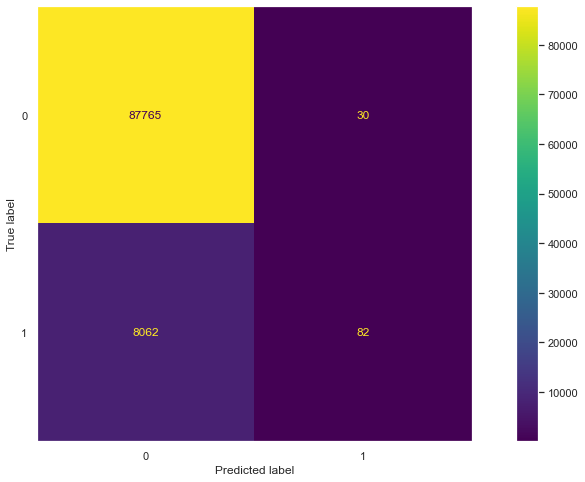

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled_full, y_full, test_size = 0.3)
knn = KNeighborsClassifier(n_neighbors = 410)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
confusion = confusion_matrix(y_test, pred, labels = knn.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=knn.classes_)
display.plot()
plt.grid(False)
plt.show()

In [43]:
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


recall:  1.006876227897839
precision:  73.21428571428571


#### Insight:
After extensive search for K using 35% of dataset, K = 410 was found to be working the best. That was checked by finding ROC-AUC on full dataset for K = 100, 350 and 410, results yielded that K 410 yields a very good ROC-AUC. Although it seems K = 350 perfroms slightly better however that can be due to randomness of the data. 

###  2.1.5. K Nearest Neighbor with n_neighbors = 410  (Best Algorithm for K-NN)
After a lot of hyperparameter tweaking, K range between 300-420 gives approximately the same results with 0.0001 difference. Best K value is decided to be 410 in this case as it was given by grid search.

## 2.2 MODEL: GRADIENT BOOSTING CLASSIFIER

Now lets try doing the same search for best parameters and hyper parameter tuning with extensive search for Gradient Boosting:

### 2.2.1. GB on Sample Scaled Dataset

First lets find in what range does the best parameters lie by running GB on a fraction of our data 

In [15]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier()
scores = cross_val_score(gb, x_scaled , np.ravel(y), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = -1)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   26.3s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   26.5s remaining:   11.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   26.8s finished


0.8372
time: 27.1 s (started: 2022-05-05 16:09:27 +05:00)


In [16]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 200)
scores = cross_val_score(gb, x_scaled , np.ravel(y), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = -1)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   44.7s remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   45.3s remaining:   19.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   45.6s finished


0.8389
time: 45.9 s (started: 2022-05-05 16:10:45 +05:00)


In [17]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)

gb = GradientBoostingClassifier()
param_grid = {
     'n_estimators': [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300]

}
grid_search = GridSearchCV(estimator = gb, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 13 candidates, totalling 130 fits
0.8391011485405372
GradientBoostingClassifier(n_estimators=300)
time: 38min 21s (started: 2022-05-05 16:12:20 +05:00)


In [18]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)

gb = GradientBoostingClassifier()
param_grid = {
     'n_estimators': [100,200,300,400,500,600],
     'learning_rate':[0.01,0.05,0.1,0.2,0.3]

}
grid_search = GridSearchCV(estimator = gb, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
0.8393309749202482
GradientBoostingClassifier(learning_rate=0.05, n_estimators=600)
time: 47min 32s (started: 2022-05-05 17:06:10 +05:00)


In [32]:
cv_results = grid_search.cv_results_
cv_results.keys

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

time: 0 ns (started: 2022-05-05 18:06:17 +05:00)


In [37]:
i = 0
list_of_max_args = []
list_of_max = []
for key in cv_results.keys():
    if i >=7 and i<=16:
        list_of_max_args.append(np.argmax(cv_results[key]))
        list_of_max.append(cv_results[key].max())
    i+=1


time: 0 ns (started: 2022-05-05 18:12:13 +05:00)


In [41]:
cv_results['params'][19]

{'learning_rate': 0.2, 'n_estimators': 200}

time: 0 ns (started: 2022-05-05 18:17:08 +05:00)


In [39]:
print(list_of_max_args)
print(list_of_max)

[14, 19, 24, 10, 19, 19, 9, 19, 13, 14]
[0.8373230851373751, 0.8449177738595888, 0.8450956149780388, 0.8316416611464679, 0.832117081083844, 0.8462478941776878, 0.8373677941123379, 0.837165476967486, 0.8510074638646237, 0.8339150280995118]
time: 0 ns (started: 2022-05-05 18:12:32 +05:00)


In [42]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)

gb = GradientBoostingClassifier()
param_grid = {
     'n_estimators': [500,600,700,800,900,1000],
     'learning_rate':[0.05]

}
grid_search = GridSearchCV(estimator = gb, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
0.8393460392650672
GradientBoostingClassifier(learning_rate=0.05, n_estimators=600)
time: 20min 38s (started: 2022-05-05 18:18:11 +05:00)


In [48]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.05)
scores = cross_val_score(gb, x_scaled , np.ravel(y), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = -1)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   57.0s remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   57.0s remaining:   24.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   57.1s finished


0.8375
time: 57.4 s (started: 2022-05-05 18:46:37 +05:00)


In [49]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 400, max_depth = 10)
scores = cross_val_score(gb, x_scaled , np.ravel(y), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = -1)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  6.2min remaining: 14.5min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  6.2min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.2min finished


0.7930
time: 6min 15s (started: 2022-05-05 18:47:35 +05:00)


In [51]:
cv = StratifiedKFold(n_splits=5, random_state = 0, shuffle = True)

gb = GradientBoostingClassifier()
param_grid = {
     'n_estimators': [300, 600, 900, 1200],
     'learning_rate':[0.05, 0.1, 0.3],
     'max_depth' :[5, 10, 15, 20]

}
grid_search = GridSearchCV(estimator = gb, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: 

time: 5h 21min 11s (started: 2022-05-05 18:59:09 +05:00)


##### After running this piece of code rigorously for 5 hours, it was clear that increasing max_depth decreases AUC-ROC. Increasing number of estimators or learning rate slightly decreased AUC-ROC. The run was stopped but the script for its result is available as a TXT file.

In [ ]:
#### cv = StratifiedKFold(n_splits=5, random_state = 0, shuffle = True)

gb = GradientBoostingClassifier()
param_grid = {
     'n_estimators': [100,200,300,400,500,600,700,800,900,1000],
     'learning_rate':[0.05, 0.1, 0.2, 0.3, 0.4],
     'max_depth' :[3 , 5, 10 , 15, 20]

}
grid_search = GridSearchCV(estimator = gb, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

In [52]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.05, max_depth = 5)
scores = cross_val_score(gb, x_scaled , np.ravel(y), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = -1)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  2.3min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  2.3min remaining:   58.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.3min finished


0.8388
time: 2min 17s (started: 2022-05-06 00:21:41 +05:00)


In [53]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.05, max_depth = 7)
scores = cross_val_score(gb, x_scaled , np.ravel(y), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = -1)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  3.2min remaining:  7.5min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  3.2min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.2min finished


0.8355
time: 3min 14s (started: 2022-05-06 00:23:58 +05:00)


In [54]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.05, max_depth = 4)
scores = cross_val_score(gb, x_scaled , np.ravel(y), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = -1)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  1.8min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.8min remaining:   45.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.8min finished


0.8391
time: 1min 47s (started: 2022-05-06 00:27:13 +05:00)


In [55]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)

gb = GradientBoostingClassifier()
param_grid = {
     'n_estimators': [300, 600],
     'learning_rate':[0.01, 0.025, 0.05, 0.075],

}
grid_search = GridSearchCV(estimator = gb, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
0.8393263707450093
GradientBoostingClassifier(learning_rate=0.05, n_estimators=600)
time: 17min 29s (started: 2022-05-06 00:31:00 +05:00)


In [56]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 600, learning_rate = 0.75)
scores = cross_val_score(gb, x_scaled , np.ravel(y), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 10)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:  3.1min remaining:  7.3min
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:  3.2min remaining:  1.4min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:  3.2min finished


0.8149
time: 3min 10s (started: 2022-05-06 00:49:08 +05:00)


In [57]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 600, learning_rate = 0.05)
scores = cross_val_score(gb, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 5)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   5 out of  10 | elapsed:  5.5min remaining:  5.5min
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed: 10.5min finished


0.8419
time: 10min 31s (started: 2022-05-06 00:55:30 +05:00)


In [59]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 800, learning_rate = 0.05)
scores = cross_val_score(gb, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 5)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   5 out of  10 | elapsed:  5.8min remaining:  5.8min
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed: 14.2min finished


0.8421
time: 14min 9s (started: 2022-05-06 01:09:02 +05:00)


In [60]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.05)
scores = cross_val_score(gb, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 10)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:  9.7min remaining: 22.6min
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:  9.7min remaining:  4.2min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:  9.7min finished


0.8416
time: 9min 42s (started: 2022-05-06 01:23:11 +05:00)


### 2.2.2. Winner Parameters for GB on Sample Dataset:
So the best parameters for gradient boosting achieved for this fraction of dataset are with learning rate as 0.05, max_depth as 3 and n-estimators between 300-600

### 2.2.3. GB on Full Dataset

Now lets use the same algorithm on the full data to see the results:

In [61]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 600, learning_rate = 0.05)
scores = cross_val_score(gb, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 2)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed: 20.8min finished


0.8419
time: 20min 49s (started: 2022-05-06 01:39:29 +05:00)


In [62]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.05)
scores = cross_val_score(gb, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 2)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed: 11.9min finished


0.8405
time: 11min 55s (started: 2022-05-06 02:00:18 +05:00)


In [63]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 600, learning_rate = 0.05)
scores = cross_val_score(gb, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 2)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed: 22.5min finished


0.8419
time: 22min 27s (started: 2022-05-06 02:14:35 +05:00)


## BEST GB MODEL WITHOUT SMOTE:

In [66]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.05)
scores = cross_val_score(gb, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 5)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   5 out of  10 | elapsed: 11.1min remaining: 11.1min
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed: 22.4min finished


0.8422
time: 22min 26s (started: 2022-05-06 02:46:44 +05:00)


#### This is the best ROC-AUC score of 0.8422 by gradient boosting using n_est = 1000, LR = 0.05

In [67]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 900, learning_rate = 0.05)
scores = cross_val_score(gb, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 5)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   5 out of  10 | elapsed: 10.1min remaining: 10.1min
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed: 20.3min finished


0.8422
time: 20min 16s (started: 2022-05-06 03:21:27 +05:00)


In [13]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 800, learning_rate = 0.05)
scores = cross_val_score(gb, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 10)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed: 13.6min remaining: 31.8min
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed: 13.7min remaining:  5.9min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed: 13.7min finished


0.8421
time: 13min 40s (started: 2022-05-06 04:18:27 +05:00)


In [4]:
full_df.shape

(319795, 18)

### 2.2.4. GB With Feature Reduction (11 Best Features)

Text(0.5, 1.0, 'Best Features achieved by the best algorithm')

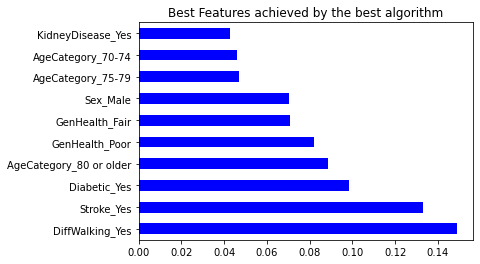

time: 3min 39s (started: 2022-05-06 04:50:49 +05:00)


In [15]:
gb = GradientBoostingClassifier(n_estimators = 600, learning_rate = 0.05)
gb.fit(x_scaled_full, y_full)
importancegb = pd.Series(gb.feature_importances_, index = x_scaled_full.columns)
importancegb_sorted = importancegb.sort_values()
importancegb_sorted.nlargest(10).plot(kind = 'barh', color = 'blue')
plt.title("Best Features achieved by the best algorithm")

In [30]:
importancegb_sorted.nlargest(18)

DiffWalking_Yes            0.149065
Stroke_Yes                 0.132783
Diabetic_Yes               0.098447
AgeCategory_80 or older    0.088679
GenHealth_Poor             0.082006
GenHealth_Fair             0.071016
Sex_Male                   0.070484
AgeCategory_75-79          0.046848
AgeCategory_70-74          0.046140
KidneyDisease_Yes          0.042914
GenHealth_Good             0.029868
Smoking_Yes                0.026450
AgeCategory_65-69          0.020206
PhysicalHealth             0.016860
BMI                        0.011113
Race_White                 0.010809
AgeCategory_60-64          0.009076
SkinCancer_Yes             0.006774
dtype: float64

time: 0 ns (started: 2022-05-06 05:00:33 +05:00)


In [89]:
importancegb_sorted.nlargest(18).sum()

0.9595372986536895

time: 0 ns (started: 2022-05-06 12:15:16 +05:00)


In [23]:
full_df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

time: 0 ns (started: 2022-05-06 04:56:53 +05:00)


In [33]:
important_df = full_df[['DiffWalking', 'Stroke', 'Diabetic', 'AgeCategory', 'GenHealth',  
                        'Sex', 'KidneyDisease', 'BMI', 'PhysicalHealth', 'Race', 'SkinCancer', 'HeartDisease']]
important_df.shape

(319795, 12)

time: 31 ms (started: 2022-05-06 05:01:38 +05:00)


In [34]:
X_important = important_df.drop(columns = ['HeartDisease'])
y_important = important_df[['HeartDisease']]
x_onehot_important = pd.get_dummies(X_important, drop_first = True)
scaler = MinMaxScaler()
scaler.fit(x_onehot_important)
x_scaled_important = scaler.transform(x_onehot_important)
x_scaled_important = pd.DataFrame(x_scaled_important, columns = x_onehot_important.columns)

time: 297 ms (started: 2022-05-06 05:03:09 +05:00)


In [37]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 600, learning_rate = 0.05)
scores = cross_val_score(gb, x_scaled_important , np.ravel(y_important), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 5)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   5 out of  10 | elapsed:  4.9min remaining:  4.9min
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:  9.6min finished


0.8388
time: 9min 36s (started: 2022-05-06 05:04:45 +05:00)


In [38]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 800, learning_rate = 0.05)
scores = cross_val_score(gb, x_scaled_important , np.ravel(y_important), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 5)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   5 out of  10 | elapsed:  5.5min remaining:  5.5min
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed: 11.4min finished


0.8390
time: 11min 23s (started: 2022-05-06 05:14:21 +05:00)


In [40]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 400, learning_rate = 0.05)
scores = cross_val_score(gb, x_scaled_important , np.ravel(y_important), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 10)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:  5.5min remaining: 12.8min
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:  5.5min remaining:  2.3min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:  5.5min finished


0.8383
time: 5min 29s (started: 2022-05-06 05:31:41 +05:00)


### 2.2.5. GB With Feature Reduction (Top 8 Features)

In [97]:
importancegb_sorted.nlargest(14)

DiffWalking_Yes            0.149065
Stroke_Yes                 0.132783
Diabetic_Yes               0.098447
AgeCategory_80 or older    0.088679
GenHealth_Poor             0.082006
GenHealth_Fair             0.071016
Sex_Male                   0.070484
AgeCategory_75-79          0.046848
AgeCategory_70-74          0.046140
KidneyDisease_Yes          0.042914
GenHealth_Good             0.029868
Smoking_Yes                0.026450
AgeCategory_65-69          0.020206
PhysicalHealth             0.016860
dtype: float64

time: 0 ns (started: 2022-05-06 12:19:11 +05:00)


In [95]:
importancegb_sorted.nlargest(14).sum()

0.921765196120801

time: 0 ns (started: 2022-05-06 12:18:58 +05:00)


In [45]:
important_df1 = full_df[['DiffWalking', 'Stroke', 'Diabetic', 'AgeCategory',
                         'GenHealth',  'Sex', 'KidneyDisease',  'PhysicalHealth', 'HeartDisease']]
important_df1.shape

(319795, 9)

time: 16 ms (started: 2022-05-06 05:41:53 +05:00)


In [46]:
X_important1 = important_df1.drop(columns = ['HeartDisease'])
y_important1 = important_df1[['HeartDisease']]
x_onehot_important1 = pd.get_dummies(X_important1, drop_first = True)
scaler = MinMaxScaler()
scaler.fit(x_onehot_important1)
x_scaled_important1 = scaler.transform(x_onehot_important1)
x_scaled_important1 = pd.DataFrame(x_scaled_important1, columns = x_onehot_important1.columns)

time: 234 ms (started: 2022-05-06 05:43:21 +05:00)


In [48]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 600, learning_rate = 0.05)
scores = cross_val_score(gb, x_scaled_important1 , np.ravel(y_important1), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 5)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   5 out of  10 | elapsed:  3.1min remaining:  3.1min
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:  6.1min finished


0.8376
time: 6min 9s (started: 2022-05-06 05:43:57 +05:00)


In [49]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 800, learning_rate = 0.05)
scores = cross_val_score(gb, x_scaled_important1 , np.ravel(y_important1), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 5)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   5 out of  10 | elapsed:  3.8min remaining:  3.8min
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:  7.6min finished


0.8380
time: 7min 33s (started: 2022-05-06 05:50:07 +05:00)


In [115]:
cv = KFold(n_splits=10, random_state = 0, shuffle = True)
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5)
scores = cross_val_score(gb, x_scaled_full , np.ravel(y_full), scoring="roc_auc", cv=cv, verbose = 3, n_jobs = 10)
  
score = format(np.mean(scores), '.4f')
print(score)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:  2.8min remaining:  6.6min
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:  2.8min remaining:  1.2min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:  2.8min finished


0.8415
time: 2min 50s (started: 2022-05-06 15:36:27 +05:00)


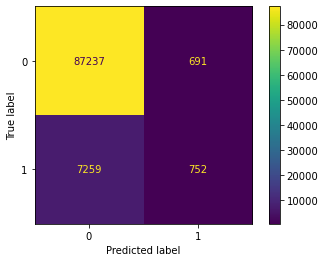

time: 2min 49s (started: 2022-05-06 12:41:49 +05:00)


In [100]:
#CONFUSION MATRIX OF GB WITH TOP 18 FEATURES

x_train, x_test, y_train, y_test = train_test_split(x_scaled_important, y_important, test_size = 0.3)
gb = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.05)
gb.fit(x_train, y_train)
pred = gb.predict(x_test)
confusion = confusion_matrix(y_test, pred, labels = gb.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=gb.classes_)
display.plot()
plt.grid(False)
plt.show()

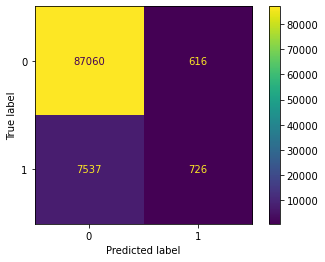

time: 1min 56s (started: 2022-05-06 12:44:38 +05:00)


In [101]:
#CONFUSION MATRIX OF GB WITH TOP 14 FEATURES

x_train, x_test, y_train, y_test = train_test_split(x_scaled_important1, y_important1, test_size = 0.3)
gb = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.05)
gb.fit(x_train, y_train)
pred = gb.predict(x_test)
confusion = confusion_matrix(y_test, pred, labels = gb.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=gb.classes_)
display.plot()
plt.grid(False)
plt.show()


#### Best ROC-AUC of GB with 18 Features: 0.839
#### Best ROC-AUC of GB with 14 Features: 0.841
#### Best ROC-AUC of GB with All Features: 0.8422
As we can conclude from the above confusion matrices, Feature reduction does not help GB at all. All features are important in our dataset and our ROC AUC of GB with 0.8422 still works best.

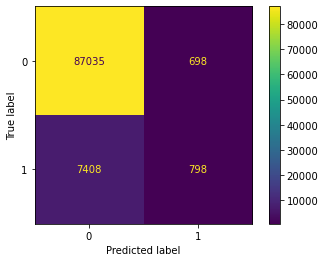

time: 3min 19s (started: 2022-05-06 12:38:29 +05:00)


In [99]:
#CONFUSION MATRIX OF GB ON FULL DATASET WITH BEST PARAMETERS

x_train, x_test, y_train, y_test = train_test_split(x_scaled_full, y_full, test_size = 0.3)
gb = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.05)
gb.fit(x_train, y_train)
pred = gb.predict(x_test)
confusion = confusion_matrix(y_test, pred, labels = gb.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=gb.classes_)
display.plot()
plt.grid(False)
plt.show()

##### ON FULL DATASET WITH LR = 0.05, N_EST = 1000

recall = 9%               
precision = 54%
AUC = 0.8415

As we can see the False negative rate is too large compared to true positive rate which means recall is really bad. We will try to balance our dataset through SMOTE later on to see if imbalanceness is the issue or not.

## 2.3 Model: Random Forest Classifier

### 2.3.1. RF Classifier on Sample Dataset

We will train our models on a sample of dataset (0.35) first as it takes less time. 
##### We start with an exhaustive search on n_estimators parameter within a range of 100 to 1000.

In [9]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier()
param_grid= {
   "n_estimators" :range(100,1100,100),
    
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -10, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .................n_estimators=100;, score=0.807 total time=  13.0s
[CV 2/10] END .................n_estimators=100;, score=0.793 total time=  14.3s
[CV 3/10] END .................n_estimators=100;, score=0.795 total time=  12.7s
[CV 4/10] END .................n_estimators=100;, score=0.791 total time=  12.7s
[CV 5/10] END .................n_estimators=100;, score=0.789 total time=  13.0s
[CV 6/10] END .................n_estimators=100;, score=0.794 total time=  12.4s
[CV 7/10] END .................n_estimators=100;, score=0.785 total time=  12.4s
[CV 8/10] END .................n_estimators=100;, score=0.801 total time=  12.7s
[CV 9/10] END .................n_estimators=100;, score=0.794 total time=  13.4s
[CV 10/10] END ................n_estimators=100;, score=0.794 total time=  13.0s
[CV 1/10] END .................n_estimators=200;, score=0.808 total time=  25.0s
[CV 2/10] END .................n_estimators=20

#### Insight:
The ROC scores increase from 0.792 (with 100 estimators) to 0.811 (with 1000 estimators). Although the rate of increase in scores slows down over 600 trees. We choose 1000 estimators to get better results on sample dataset.

##### Next we focus on max depth parameter, while keeping max features "sqrt" based on convention.

In [12]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "max_depth":range(10,50,10),
    "max_features":["sqrt"],
    "n_estimators":[1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
0.8311937348915318
RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=1000,
                       n_jobs=-1)


In [13]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "max_depth":range(10,50,10),
    "max_features":["sqrt"],
    "n_estimators":[400]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
0.8309656713500779
RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=1000,
                       n_jobs=-1)


In [11]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "max_depth":[20],
    "max_features":["sqrt"],
    "n_estimators":[600, 700, 800]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
0.8310036108706764
RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=600,
                       n_jobs=-1)


In [10]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "max_depth":[20],
    "max_features":["sqrt"],
    "n_estimators":[500, 1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
0.8310928219512224
RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=1000,
                       n_jobs=-1)


In [49]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "max_depth":[20,30],
    "max_features":["sqrt"],
    "n_estimators":[1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
0.8273349985758782
RandomForestClassifier(max_depth=20, max_features='sqrt', n_jobs=-1)


In [13]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "max_depth":range(10,50,10),
    "max_features":[5],
    "n_estimators":[1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
0.8277382965250808
RandomForestClassifier(max_depth=20, max_features=5, n_estimators=1000,
                       n_jobs=-1)


##### The best max depth is 20 irrespective of estimators. Next we focus on max features. 

In [13]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "max_depth":[20],
    "max_features":range(5,20,5),
    "n_estimators":[400]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
0.8309262895361392
RandomForestClassifier(max_depth=20, max_features=5, n_estimators=400,
                       n_jobs=-1)


In [52]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "max_depth":[20],
    "max_features":range(5,20,5),
    "n_estimators":[1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
0.8306227394011758
RandomForestClassifier(max_depth=20, max_features=5, n_estimators=1000,
                       n_jobs=-1)


In [ ]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "max_depth":[20],
    "max_features":[5],
    "n_estimators":[1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

    Fitting 10 folds for each of 1 candidates, totalling 10 fits
    0.8361678298138022
    RandomForestClassifier(max_depth=20, max_features=5, n_estimators=1000,
                           n_jobs=-1)

In [11]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "max_depth":[20],
    "max_features":[5],
    "n_estimators":[400]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
0.8274349151929948
RandomForestClassifier(max_depth=20, max_features=5, n_estimators=400,
                       n_jobs=-1)


#### Insight:
As per convention max_features in RF should be less than Sqrt of total features (38 after one hot encoding). That's why the max_features selected by grid search are 5. 

The best score we got up till now is 0.836, when n_est = 1000, depth = 20, features = 5.



##### Next, we focus on min_samples_split and min_samples_leaf parameter.

In [13]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "min_samples_split": range(5,20,5),
    "max_depth":[20],
    "max_features":[5],
    "n_estimators":[1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -10, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV 1/10] END max_depth=20, max_features=5, min_samples_split=5, n_estimators=1000;, score=0.840 total time=  37.7s
[CV 2/10] END max_depth=20, max_features=5, min_samples_split=5, n_estimators=1000;, score=0.836 total time=  39.0s
[CV 3/10] END max_depth=20, max_features=5, min_samples_split=5, n_estimators=1000;, score=0.841 total time=  40.3s
[CV 4/10] END max_depth=20, max_features=5, min_samples_split=5, n_estimators=1000;, score=0.833 total time=  40.2s
[CV 5/10] END max_depth=20, max_features=5, min_samples_split=5, n_estimators=1000;, score=0.828 total time=  39.6s
[CV 6/10] END max_depth=20, max_features=5, min_samples_split=5, n_estimators=1000;, score=0.818 total time=  39.7s
[CV 7/10] END max_depth=20, max_features=5, min_samples_split=5, n_estimators=1000;, score=0.836 total time=  41.7s
[CV 8/10] END max_depth=20, max_features=5, min_samples_split=5, n_estimators=1000;, score=0.826 total time=  41.0s
[CV 9/10] E

In [14]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "min_samples_split": range(100,1100,100),
    "max_depth":[20],
    "max_features":[5],
    "n_estimators":[1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -10, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END max_depth=20, max_features=5, min_samples_split=100, n_estimators=1000;, score=0.843 total time=  34.1s
[CV 2/10] END max_depth=20, max_features=5, min_samples_split=100, n_estimators=1000;, score=0.841 total time=  34.2s
[CV 3/10] END max_depth=20, max_features=5, min_samples_split=100, n_estimators=1000;, score=0.844 total time=  33.9s
[CV 4/10] END max_depth=20, max_features=5, min_samples_split=100, n_estimators=1000;, score=0.837 total time=  34.0s
[CV 5/10] END max_depth=20, max_features=5, min_samples_split=100, n_estimators=1000;, score=0.832 total time=  34.1s
[CV 6/10] END max_depth=20, max_features=5, min_samples_split=100, n_estimators=1000;, score=0.821 total time=  33.8s
[CV 7/10] END max_depth=20, max_features=5, min_samples_split=100, n_estimators=1000;, score=0.842 total time=  34.0s
[CV 8/10] END max_depth=20, max_features=5, min_samples_split=100, n_estimators=1000;, score=0.830 total time= 

In [20]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "min_samples_leaf": range(5,25,5),
    "max_depth":[20],
    "max_features":[5],
    "n_estimators":[1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -10, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END max_depth=20, max_features=5, min_samples_leaf=5, n_estimators=1000;, score=0.842 total time=  41.6s
[CV 2/10] END max_depth=20, max_features=5, min_samples_leaf=5, n_estimators=1000;, score=0.840 total time=  38.0s
[CV 3/10] END max_depth=20, max_features=5, min_samples_leaf=5, n_estimators=1000;, score=0.844 total time=  38.3s
[CV 4/10] END max_depth=20, max_features=5, min_samples_leaf=5, n_estimators=1000;, score=0.837 total time=  39.0s
[CV 5/10] END max_depth=20, max_features=5, min_samples_leaf=5, n_estimators=1000;, score=0.832 total time=  37.5s
[CV 6/10] END max_depth=20, max_features=5, min_samples_leaf=5, n_estimators=1000;, score=0.822 total time=  38.1s
[CV 7/10] END max_depth=20, max_features=5, min_samples_leaf=5, n_estimators=1000;, score=0.842 total time=  40.0s
[CV 8/10] END max_depth=20, max_features=5, min_samples_leaf=5, n_estimators=1000;, score=0.829 total time=  40.4s
[CV 9/10] END max_d

In [15]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "min_samples_leaf": range(100,1100,100),
    "max_depth":[20],
    "max_features":[5],
    "n_estimators":[1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -10, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END max_depth=20, max_features=5, min_samples_leaf=100, n_estimators=1000;, score=0.839 total time=  29.4s
[CV 2/10] END max_depth=20, max_features=5, min_samples_leaf=100, n_estimators=1000;, score=0.837 total time=  30.4s
[CV 3/10] END max_depth=20, max_features=5, min_samples_leaf=100, n_estimators=1000;, score=0.838 total time=  29.5s
[CV 4/10] END max_depth=20, max_features=5, min_samples_leaf=100, n_estimators=1000;, score=0.834 total time=  29.4s
[CV 5/10] END max_depth=20, max_features=5, min_samples_leaf=100, n_estimators=1000;, score=0.828 total time=  29.1s
[CV 6/10] END max_depth=20, max_features=5, min_samples_leaf=100, n_estimators=1000;, score=0.817 total time=  29.3s
[CV 7/10] END max_depth=20, max_features=5, min_samples_leaf=100, n_estimators=1000;, score=0.840 total time=  29.3s
[CV 8/10] END max_depth=20, max_features=5, min_samples_leaf=100, n_estimators=1000;, score=0.826 total time=  29.5s
[

##### After an exhaustive search on both the parameters with GridSearchCV we observe the best scores are between 20 - 100. Next we test both parameters together.

In [18]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "min_samples_split": [50],
    "min_samples_leaf": [50],
    "max_depth":[20],
    "max_features":[5],
    "n_estimators":[1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -10, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)  

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END max_depth=20, max_features=5, min_samples_leaf=50, min_samples_split=50, n_estimators=1000;, score=0.840 total time=  36.0s
[CV 2/10] END max_depth=20, max_features=5, min_samples_leaf=50, min_samples_split=50, n_estimators=1000;, score=0.839 total time=  38.0s
[CV 3/10] END max_depth=20, max_features=5, min_samples_leaf=50, min_samples_split=50, n_estimators=1000;, score=0.841 total time=  34.7s
[CV 4/10] END max_depth=20, max_features=5, min_samples_leaf=50, min_samples_split=50, n_estimators=1000;, score=0.836 total time=  33.0s
[CV 5/10] END max_depth=20, max_features=5, min_samples_leaf=50, min_samples_split=50, n_estimators=1000;, score=0.830 total time=  32.2s
[CV 6/10] END max_depth=20, max_features=5, min_samples_leaf=50, min_samples_split=50, n_estimators=1000;, score=0.819 total time=  34.5s
[CV 7/10] END max_depth=20, max_features=5, min_samples_leaf=50, min_samples_split=50, n_estimators=1000;, scor

In [22]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "min_samples_split": [15],
    "min_samples_leaf": [15],
    "max_depth":[20],
    "max_features":[5],
    "n_estimators":[1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -10, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)  

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, score=0.842 total time=  37.6s
[CV 2/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, score=0.840 total time=  37.7s
[CV 3/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, score=0.844 total time=  34.9s
[CV 4/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, score=0.837 total time=  37.7s
[CV 5/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, score=0.832 total time=  36.2s
[CV 6/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, score=0.822 total time=  41.7s
[CV 7/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, scor

In [ ]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "min_samples_split": [100],
    "min_samples_leaf": [100],
    "max_depth":[20],
    "max_features":[5],
    "n_estimators":[1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -10, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)  

    Fitting 10 folds for each of 1 candidates, totalling 10 fits
    0.8363959698999016
    RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=100,
                           min_samples_split=100, n_estimators=1000, n_jobs=-1)

In [ ]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "min_samples_split": [100],
    "min_samples_leaf": [50],
    "max_depth":[20],
    "max_features":[5],
    "n_estimators":[1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -10, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled, y.values.ravel())
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)  

    Fitting 10 folds for each of 1 candidates, totalling 10 fits
    0.8380560645333345
    RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=50,
                           min_samples_split=100, n_estimators=1000, n_jobs=-1)

### 2.3.2. RF Classifier Results on Sample Dataset

After an exhaustive search, we get our best Score of 0.838 on the sample dataset with the following parameters: 

    min_samples_split: [100],
    min_samples_leaf: [50],
    max_depth:[20],
    max_features:[5],
    n_estimators:[1000]

### 2.3.3. RF Classifier on Full Dataset

##### Now we will test final parameters on the entire dataset using GridSearchCV 

In [10]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "max_depth":[20],
    "max_features":[5, "sqrt"],
    "n_estimators":[400]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 10, scoring = 'roc_auc')
grid_search.fit(x_scaled_full , np.ravel(y_full))
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
0.8357500025719118
RandomForestClassifier(max_depth=20, max_features=5, n_estimators=400,
                       n_jobs=-1)


In [ ]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "max_depth":[20],
    "max_features":[5],
    "n_estimators":[700, 800, 1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 10, scoring = 'roc_auc')
grid_search.fit(x_scaled_full , np.ravel(y_full))
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

    Fitting 10 folds for each of 3 candidates, totalling 30 fits
    0.8360846618417428
    RandomForestClassifier(max_depth=20, max_features=5, n_estimators=700,
                           n_jobs=-1)

In [15]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "max_depth":[20],
    "max_features":[5],
    "n_estimators":[400]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled_full , np.ravel(y_full))
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
0.8357690383459871
RandomForestClassifier(max_depth=20, max_features=5, n_estimators=400,
                       n_jobs=-1)


In [12]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "max_depth":[20],
    "max_features":[5],
    "n_estimators":[1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled_full , np.ravel(y_full))
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
0.83613514088394
RandomForestClassifier(max_depth=20, max_features=5, n_estimators=1000,
                       n_jobs=-1)


In [8]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "max_depth":[20],
    "max_features":[4,5,8],
    "n_estimators":[1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -10, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled_full , np.ravel(y_full))
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV 1/10] END max_depth=20, max_features=4, n_estimators=1000;, score=0.837 total time= 1.9min
[CV 2/10] END max_depth=20, max_features=4, n_estimators=1000;, score=0.841 total time= 1.9min
[CV 3/10] END max_depth=20, max_features=4, n_estimators=1000;, score=0.839 total time= 2.0min
[CV 4/10] END max_depth=20, max_features=4, n_estimators=1000;, score=0.833 total time= 2.0min
[CV 5/10] END max_depth=20, max_features=4, n_estimators=1000;, score=0.837 total time= 1.9min
[CV 6/10] END max_depth=20, max_features=4, n_estimators=1000;, score=0.839 total time= 1.9min
[CV 7/10] END max_depth=20, max_features=4, n_estimators=1000;, score=0.832 total time= 1.9min
[CV 8/10] END max_depth=20, max_features=4, n_estimators=1000;, score=0.832 total time= 1.9min
[CV 9/10] END max_depth=20, max_features=4, n_estimators=1000;, score=0.832 total time= 1.9min
[CV 10/10] END max_depth=20, max_features=4, n_estimators=1000;, score=0.840 total t

In [24]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "min_samples_split": [100],
    "min_samples_leaf": [100],
    "max_depth":[20],
    "max_features":[5],
    "n_estimators":[1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -10, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled_full , np.ravel(y_full))
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)  

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END max_depth=20, max_features=5, min_samples_leaf=100, min_samples_split=100, n_estimators=1000;, score=0.838 total time= 1.9min
[CV 2/10] END max_depth=20, max_features=5, min_samples_leaf=100, min_samples_split=100, n_estimators=1000;, score=0.842 total time= 1.9min
[CV 3/10] END max_depth=20, max_features=5, min_samples_leaf=100, min_samples_split=100, n_estimators=1000;, score=0.839 total time= 1.9min
[CV 4/10] END max_depth=20, max_features=5, min_samples_leaf=100, min_samples_split=100, n_estimators=1000;, score=0.834 total time= 1.9min
[CV 5/10] END max_depth=20, max_features=5, min_samples_leaf=100, min_samples_split=100, n_estimators=1000;, score=0.839 total time= 1.9min
[CV 6/10] END max_depth=20, max_features=5, min_samples_leaf=100, min_samples_split=100, n_estimators=1000;, score=0.840 total time= 1.9min
[CV 7/10] END max_depth=20, max_features=5, min_samples_leaf=100, min_samples_split=100, n_estimato

In [ ]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "min_samples_split": [100],
    "min_samples_leaf": [50],
    "max_depth":[20],
    "max_features":[5],
    "n_estimators":[1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -10, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled_full , np.ravel(y_full))
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)  

    Fitting 10 folds for each of 1 candidates, totalling 10 fits
    [CV 1/10] END max_depth=20, max_features=5, min_samples_leaf=50, min_samples_split=100, n_estimators=1000;, score=0.839 total time= 4.6min
    [CV 2/10] END max_depth=20, max_features=5, min_samples_leaf=50, min_samples_split=100, n_estimators=1000;, score=0.843 total time= 4.4min
    [CV 3/10] END max_depth=20, max_features=5, min_samples_leaf=50, min_samples_split=100, n_estimators=1000;, score=0.841 total time= 4.3min
    [CV 4/10] END max_depth=20, max_features=5, min_samples_leaf=50, min_samples_split=100, n_estimators=1000;, score=0.836 total time= 4.3min
    [CV 5/10] END max_depth=20, max_features=5, min_samples_leaf=50, min_samples_split=100, n_estimators=1000;, score=0.841 total time= 4.3min
    [CV 6/10] END max_depth=20, max_features=5, min_samples_leaf=50, min_samples_split=100, n_estimators=1000;, score=0.841 total time= 4.3min
    [CV 7/10] END max_depth=20, max_features=5, min_samples_leaf=50, min_samples_split=100, n_estimators=1000;, score=0.835 total time= 4.4min
    [CV 8/10] END max_depth=20, max_features=5, min_samples_leaf=50, min_samples_split=100, n_estimators=1000;, score=0.836 total time= 4.5min
    [CV 9/10] END max_depth=20, max_features=5, min_samples_leaf=50, min_samples_split=100, n_estimators=1000;, score=0.835 total time= 4.6min
    [CV 10/10] END max_depth=20, max_features=5, min_samples_leaf=50, min_samples_split=100, n_estimators=1000;, score=0.841 total time= 4.3min
    0.8386360436638869
    RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=50,
                           min_samples_split=100, n_estimators=1000, n_jobs=-1)

##### We see that  the same parameters we selected on sample dataset, produce the highest score of 0.838 on entire dataset.
Now we will tweak our model to see if we can improve further.

In [ ]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "min_samples_split": [10],
    "min_samples_leaf": [10],
    "max_depth":[20],
    "max_features":[5],
    "n_estimators":[1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -10, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled_full , np.ravel(y_full))
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)  

    Fitting 10 folds for each of 1 candidates, totalling 10 fits
    [CV 1/10] END max_depth=20, max_features=5, min_samples_leaf=10, min_samples_split=10, n_estimators=1000;, score=0.840 total time= 4.7min
    [CV 2/10] END max_depth=20, max_features=5, min_samples_leaf=10, min_samples_split=10, n_estimators=1000;, score=0.844 total time= 4.8min
    [CV 3/10] END max_depth=20, max_features=5, min_samples_leaf=10, min_samples_split=10, n_estimators=1000;, score=0.842 total time= 4.7min
    [CV 4/10] END max_depth=20, max_features=5, min_samples_leaf=10, min_samples_split=10, n_estimators=1000;, score=0.837 total time= 4.8min
    [CV 5/10] END max_depth=20, max_features=5, min_samples_leaf=10, min_samples_split=10, n_estimators=1000;, score=0.842 total time= 4.7min
    [CV 6/10] END max_depth=20, max_features=5, min_samples_leaf=10, min_samples_split=10, n_estimators=1000;, score=0.842 total time= 4.7min
    [CV 7/10] END max_depth=20, max_features=5, min_samples_leaf=10, min_samples_split=10, n_estimators=1000;, score=0.836 total time= 4.6min
    [CV 8/10] END max_depth=20, max_features=5, min_samples_leaf=10, min_samples_split=10, n_estimators=1000;, score=0.837 total time= 4.6min
    [CV 9/10] END max_depth=20, max_features=5, min_samples_leaf=10, min_samples_split=10, n_estimators=1000;, score=0.836 total time= 4.6min
    [CV 10/10] END max_depth=20, max_features=5, min_samples_leaf=10, min_samples_split=10, n_estimators=1000;, score=0.842 total time= 4.6min
    0.8396932382744466
    RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=10,
                           min_samples_split=10, n_estimators=1000, n_jobs=-1)

In [11]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "min_samples_split": [15],
    "min_samples_leaf": [15],
    "max_depth":[20],
    "max_features":[5],
    "n_estimators":[1200]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -10, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled_full , np.ravel(y_full))
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)  

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1200;, score=0.840 total time= 2.4min
[CV 2/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1200;, score=0.844 total time= 2.5min
[CV 3/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1200;, score=0.842 total time= 2.5min
[CV 4/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1200;, score=0.837 total time= 2.4min
[CV 5/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1200;, score=0.842 total time= 2.5min
[CV 6/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1200;, score=0.842 total time= 2.5min
[CV 7/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1200;, scor

## BEST RF MODEL WITHOUT SMOTE:

In [23]:
cv = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)
rf = RandomForestClassifier(n_jobs = -1)
param_grid= {
    "min_samples_split": [15],
    "min_samples_leaf": [15],
    "max_depth":[20],
    "max_features":[5],
    "n_estimators":[1000]
    }
grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = cv, n_jobs = -10, verbose = 3, scoring = 'roc_auc')
grid_search.fit(x_scaled_full , np.ravel(y_full))
print(grid_search.best_score_)
best_grid = grid_search.best_estimator_
print(best_grid)  

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, score=0.840 total time= 2.1min
[CV 2/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, score=0.844 total time= 2.2min
[CV 3/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, score=0.842 total time= 2.1min
[CV 4/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, score=0.837 total time= 2.1min
[CV 5/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, score=0.842 total time= 2.0min
[CV 6/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, score=0.842 total time= 2.1min
[CV 7/10] END max_depth=20, max_features=5, min_samples_leaf=15, min_samples_split=15, n_estimators=1000;, scor

In [ ]:
trainX, testX, trainy, testy = train_test_split(x_scaled_full , y_full, test_size=0.3, random_state=2)

In [ ]:
rf = RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=15,
                       min_samples_split=15, n_estimators=1000, n_jobs=-1, verbose = 1)
rf.fit(trainX, trainy)
pred = rf.predict(testX)
RF_conf_matrix = confusion_matrix(testy, pred)

display = ConfusionMatrixDisplay(confusion_matrix = RF_conf_matrix, display_labels = rf.classes_)
display.plot()
plt.grid(False)
plt.show()

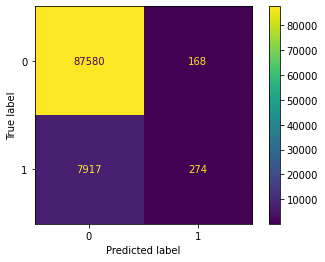

    ROC-AUC = 0.8397
    Recall = 3.3%
    Precision = 61%

In [ ]:
rf = RandomForestClassifier(max_depth=100, max_features= "sqrt", min_samples_leaf=50,
                       min_samples_split=50, n_estimators=700, n_jobs=-1, verbose = 3)
rf.fit(trainX, trainy)
pred = rf.predict(testX)
RF_conf_matrix = confusion_matrix(testy, pred)

display = ConfusionMatrixDisplay(confusion_matrix = RF_conf_matrix, display_labels = rf.classes_)
display.plot()
plt.grid(False)
plt.show()

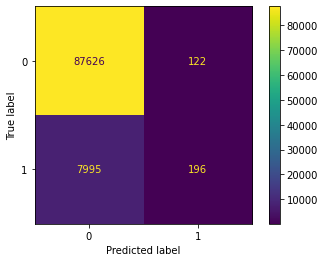

    ROC-AUC = 0.8366
    Recall = 2.3%
    Precision = 61%

### 2.3.4. RF Classifier Results on Full Dataset

After an exhaustive search, we get our best Score of 0.8397 on Full dataset with the following parameters: 

    min_samples_split: [15],
    min_samples_leaf: [15],
    max_depth:[20],
    max_features:[5],
    n_estimators:[1000]
    
However, the recall is very poor that's why data needs SMOTE training.

# 3. FINDING THE BEST MODEL (WITH SMOTE)

## 3.1. MODEL: GB with SMOTE Train/Test Split

We will divide pre-processed data into train-test split and save them as a separate csv file. Testing set will be used to gauge AUC-ROC and training set is where we will use SMOTE to balance data and find best models.

In [20]:
x_train_full, x_test_full, y_train_full, y_test_full = train_test_split(x_scaled_full, y_full, test_size = 0.3, random_state = 2)

time: 109 ms (started: 2022-05-07 18:36:16 +05:00)


In [14]:
x_train_full.to_csv('x_train_full.csv', index = False)
y_train_full.to_csv('y_train_full.csv', index = False)
y_test_full.to_csv('y_test_full.csv', index = False)
x_test_full.to_csv('x_test_full.csv', index = False)

time: 3.72 s (started: 2022-05-07 02:02:35 +05:00)


### 3.1.2. Smote with random state = 2 only

In [22]:
smote = SMOTE(random_state=2)
x_smote, y_smote = smote.fit_resample(x_train_full, y_train_full)
x_smote.shape

(409386, 37)

time: 5.61 s (started: 2022-05-07 02:34:17 +05:00)


In [16]:
gb = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.05)
gb.fit(x_smote, y_smote)
pred = gb.predict_proba(x_test_full)[:,1]
roc = roc_auc_score(y_test_full, pred)
print(roc)

0.8114721473193616
time: 10min 2s (started: 2022-05-07 02:12:51 +05:00)


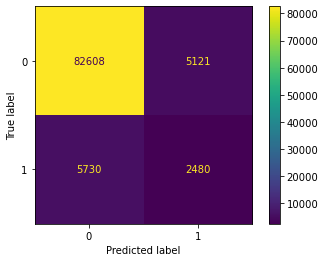

time: 1.38 s (started: 2022-05-07 02:22:54 +05:00)


In [17]:
pred1 = gb.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred1, labels = gb.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=gb.classes_)
display.plot()
plt.grid(False)
plt.show()

### 3.1.3. Smote with random state = 2 , oversampling = 0.3

In [18]:
smote = SMOTE(random_state=2, sampling_strategy = 0.3)
x_smote, y_smote = smote.fit_resample(x_train_full, y_train_full)
x_smote.shape

(266100, 37)

time: 5.67 s (started: 2022-05-07 02:25:14 +05:00)


0.8341479426407108


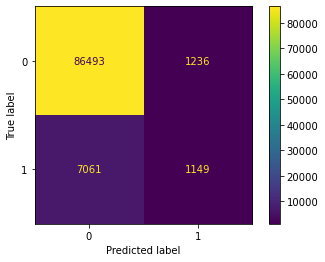

time: 5min 6s (started: 2022-05-07 02:25:46 +05:00)


In [19]:
gb = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.05)
gb.fit(x_smote, y_smote)
pred = gb.predict_proba(x_test_full)[:,1]
roc = roc_auc_score(y_test_full, pred)
print(roc)
pred1 = gb.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred1, labels = gb.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=gb.classes_)
display.plot()
plt.grid(False)
plt.show()

### 3.1.4 SMOTE with 0.1 Oversampling, 0.5 Undersampling
After several tries for different smote sampling stragies. It was decided to use sampling strategy of 0.1 and then undersample with sampling strategy of 0.5

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.837
Test AUC-ROC %.3f %  0.8379661814380864


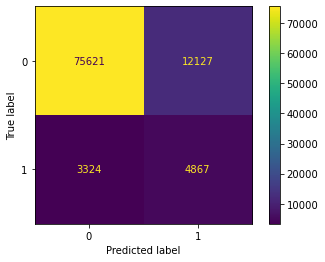

recall:  59.41887437431327
precision:  28.63951983052842
time: 6min 40s (started: 2022-05-07 18:36:27 +05:00)


In [21]:
model = gb = GradientBoostingClassifier(  max_depth =5 )
parameters = {
    "model__learning_rate": [0.05],
    "model__n_estimators":[1000],
    "model__max_depth": [5]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.841
Test AUC-ROC %.3f %  0.8414971896497627


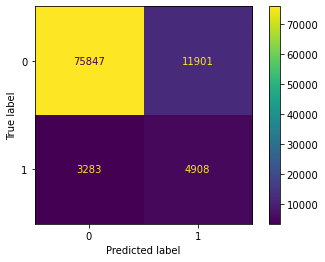

recall:  59.91942375778293
precision:  29.198643583794397
time: 2min 18s (started: 2022-05-07 18:43:08 +05:00)


In [22]:
model = gb = GradientBoostingClassifier(  max_depth =5 )
parameters = {
    "model__learning_rate": [0.05],
    "model__n_estimators":[300],
    "model__max_depth": [5]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)



Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.840
Test AUC-ROC %.3f %  0.8402960670545853


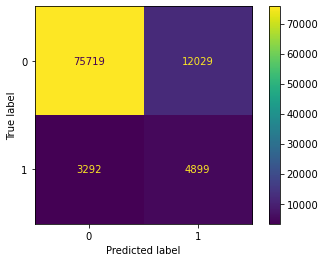

recall:  59.809547063850566
precision:  28.940217391304344
time: 4min 11s (started: 2022-05-07 18:45:27 +05:00)


In [23]:
model = gb = GradientBoostingClassifier(  max_depth =5 )
parameters = {
    "model__learning_rate": [0.05],
    "model__n_estimators":[600],
    "model__max_depth": [5]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


Fitting 10 folds for each of 30 candidates, totalling 300 fits
Train ROC AUC: 0.864
Best parameters:  {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100}
Test AUC-ROC %.3f %  0.8362911709738581


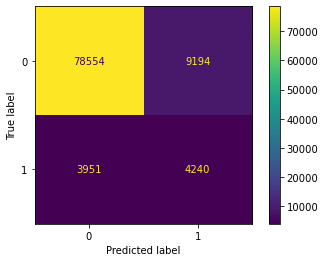

recall:  51.76413136369186
precision:  31.561709096322765
time: 41min 33s (started: 2022-05-07 21:40:58 +05:00)


In [47]:
model = gb = GradientBoostingClassifier(  )
parameters = {
    "model__learning_rate": [0.05, 0.1, 0.2],
    "model__n_estimators":[100,200,300,400,500],
    "model__max_depth": [3, 5]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3, scoring = 'roc-auc')
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))
print('Best parameters: ', clf.best_params_)

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.839
Test AUC-ROC %.3f %  0.8402454224485989


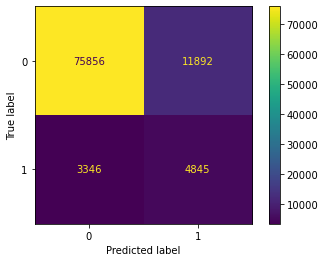

recall:  59.150286900256376
precision:  28.947840114715902
time: 2min 33s (started: 2022-05-07 23:23:53 +05:00)


In [53]:
model = gb = GradientBoostingClassifier(  )
parameters = {
    "model__learning_rate": [0.1],
    "model__n_estimators":[300],
    "model__max_depth": [5]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))


md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.835
Test AUC-ROC %.3f %  0.8342694278123566


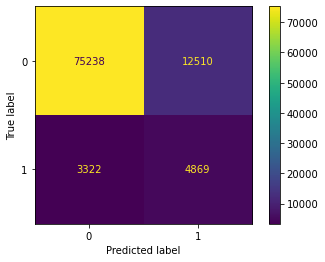

recall:  59.44329141740935
precision:  28.016571724495083
time: 2min 30s (started: 2022-05-07 23:26:27 +05:00)


In [54]:
model = gb = GradientBoostingClassifier(  )
parameters = {
    "model__learning_rate": [0.2],
    "model__n_estimators":[300],
    "model__max_depth": [5]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))


md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters:  {'model__learning_rate': 0.3, 'model__max_depth': 5, 'model__n_estimators': 300}
Test AUC-ROC %.3f %  0.830143526873192


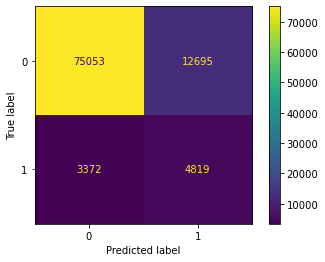

recall:  58.832865340007324
precision:  27.515130752540824
time: 2min 33s (started: 2022-05-07 23:31:15 +05:00)


In [56]:
model = gb = GradientBoostingClassifier(  )
parameters = {
    "model__learning_rate": [0.3],
    "model__n_estimators":[300],
    "model__max_depth": [5]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)

print('Best parameters: ', clf.best_params_)

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters:  {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 300}
Test AUC-ROC %.3f %  0.8416250404796498


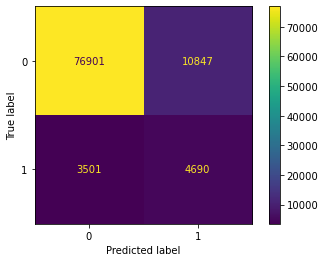

recall:  57.257966060310096
precision:  30.186007594773766
time: 1min 40s (started: 2022-05-07 23:33:48 +05:00)


In [57]:
model = gb = GradientBoostingClassifier(  )
parameters = {
    "model__learning_rate": [0.05],
    "model__n_estimators":[300],
    "model__max_depth": [3]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)

print('Best parameters: ', clf.best_params_)

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters:  {'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 300}
Test AUC-ROC %.3f %  0.842406691670029


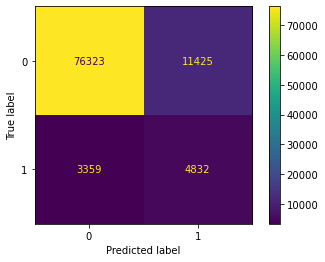

recall:  58.99157612013185
precision:  29.72258104201267
time: 1min 58s (started: 2022-05-07 23:35:28 +05:00)


In [58]:
model = gb = GradientBoostingClassifier(  )
parameters = {
    "model__learning_rate": [0.05],
    "model__n_estimators":[300],
    "model__max_depth": [4]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)

print('Best parameters: ', clf.best_params_)

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters:  {'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__n_estimators': 300}
Test AUC-ROC %.3f %  0.8409325823980457


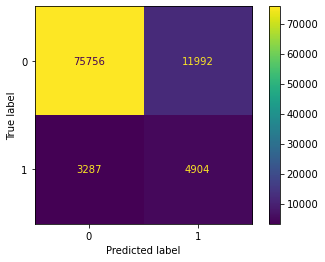

recall:  59.87058967159077
precision:  29.02462121212121
time: 2min 50s (started: 2022-05-07 23:37:26 +05:00)


In [59]:
model = gb = GradientBoostingClassifier(  )
parameters = {
    "model__learning_rate": [0.05],
    "model__n_estimators":[300],
    "model__max_depth": [6]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)

print('Best parameters: ', clf.best_params_)

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters:  {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 200}
Test AUC-ROC %.3f %  0.8418447487888691


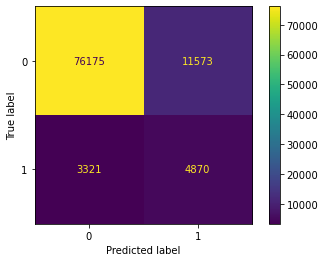

recall:  59.45549993895739
precision:  29.617466399075592
time: 1min 42s (started: 2022-05-07 23:40:16 +05:00)


In [60]:
model = gb = GradientBoostingClassifier(  )
parameters = {
    "model__learning_rate": [0.05],
    "model__n_estimators":[200],
    "model__max_depth": [5]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)

print('Best parameters: ', clf.best_params_)

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters:  {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 100}
Test AUC-ROC %.3f %  0.8409712721194305


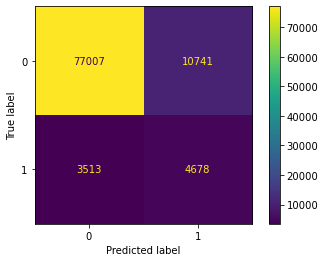

recall:  57.111463801733606
precision:  30.33919190608989
time: 1min 6s (started: 2022-05-07 23:41:59 +05:00)


In [61]:
model = gb = GradientBoostingClassifier(  )
parameters = {
    "model__learning_rate": [0.05],
    "model__n_estimators":[100],
    "model__max_depth": [5]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)

print('Best parameters: ', clf.best_params_)

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters:  {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 50}
Test AUC-ROC %.3f %  0.8359087169283508


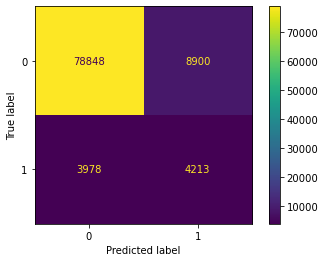

recall:  51.43450128189476
precision:  32.1284221764661
time: 50 s (started: 2022-05-07 23:43:06 +05:00)


In [62]:
model = gb = GradientBoostingClassifier(  )
parameters = {
    "model__learning_rate": [0.05],
    "model__n_estimators":[50],
    "model__max_depth": [5]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)

print('Best parameters: ', clf.best_params_)

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters:  {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 350}
Test AUC-ROC %.3f %  0.8417186565826813


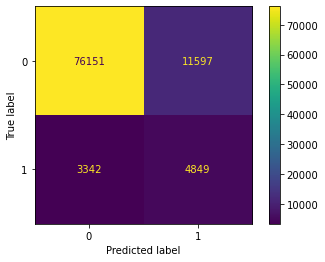

recall:  59.19912098644854
precision:  29.48437309984191
time: 2min 38s (started: 2022-05-07 23:45:59 +05:00)


In [64]:
model = gb = GradientBoostingClassifier(  )
parameters = {
    "model__learning_rate": [0.05],
    "model__n_estimators":[350],
    "model__max_depth": [5]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)

print('Best parameters: ', clf.best_params_)

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters:  {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 400}
Test AUC-ROC %.3f %  0.841160084860717


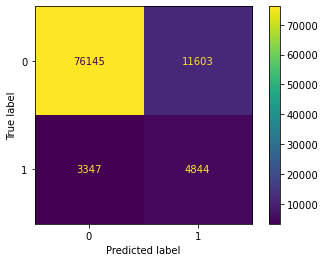

recall:  59.138078378708336
precision:  29.45217972882593
time: 2min 57s (started: 2022-05-07 23:48:37 +05:00)


In [65]:
model = gb = GradientBoostingClassifier(  )
parameters = {
    "model__learning_rate": [0.05],
    "model__n_estimators":[400],
    "model__max_depth": [5]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)

print('Best parameters: ', clf.best_params_)

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters:  {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 450}
Test AUC-ROC %.3f %  0.8413505150071068


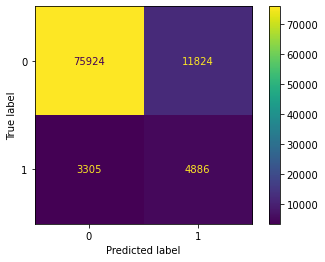

recall:  59.650836283726036
precision:  29.23997606223818
time: 3min 15s (started: 2022-05-07 23:51:35 +05:00)


In [66]:
model = gb = GradientBoostingClassifier(  )
parameters = {
    "model__learning_rate": [0.05],
    "model__n_estimators":[450],
    "model__max_depth": [5]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)

print('Best parameters: ', clf.best_params_)

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


## BEST GB MODEL WITH SMOTE

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters:  {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 250}
Test AUC-ROC %.3f %  0.8423525639038913


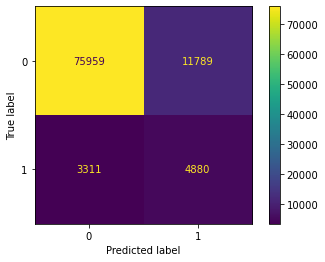

recall:  59.5775851544378
precision:  29.275901373807667
time: 2min 3s (started: 2022-05-07 23:43:56 +05:00)


In [63]:
model = gb = GradientBoostingClassifier(  )
parameters = {
    "model__learning_rate": [0.05],
    "model__n_estimators":[250],
    "model__max_depth": [5]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)

print('Best parameters: ', clf.best_params_)

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


### Insight:
As we can see after using smote on train/test split, Recall has gone up by 30% and ROC-AUC scores are still around 0.84 on the test dataset. 

## 3.2. MODEL: Logistic Regression with SMOTE Train/Test Split

0.8373676935764522


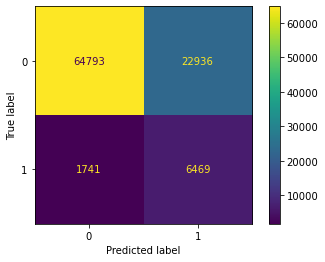

time: 3.67 s (started: 2022-05-07 02:34:26 +05:00)


In [23]:
lr = LogisticRegression( max_iter = 500)
lr.fit(x_smote, y_smote)
pred = lr.predict_proba(x_test_full)[:,1]
roc = roc_auc_score(y_test_full, pred)
print(roc)
pred1 = lr.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred1, labels = lr.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=lr.classes_)
display.plot()
plt.grid(False)
plt.show()

Recall = 78.8%
Precision = 22%
ROC AUC  = 0.8374

In [24]:
smote = SMOTE(random_state=2, sampling_strategy = 0.2)
x_smote, y_smote = smote.fit_resample(x_train_full, y_train_full)
x_smote.shape

(245631, 37)

time: 5.25 s (started: 2022-05-07 02:36:52 +05:00)


0.8380275695101302


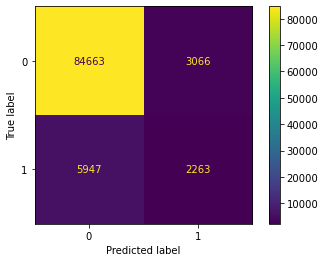

time: 2.5 s (started: 2022-05-07 02:37:09 +05:00)


In [25]:
lr = LogisticRegression( max_iter = 500)
lr.fit(x_smote, y_smote)
pred = lr.predict_proba(x_test_full)[:,1]
roc = roc_auc_score(y_test_full, pred)
print(roc)
pred1 = lr.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred1, labels = lr.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=lr.classes_)
display.plot()
plt.grid(False)
plt.show()

In [29]:
smote = SMOTE(random_state=2, sampling_strategy = 0.4)
x_smote, y_smote = smote.fit_resample(x_train_full, y_train_full)
x_smote.shape

(286570, 37)

time: 5.11 s (started: 2022-05-07 02:39:32 +05:00)


0.8375422178550658


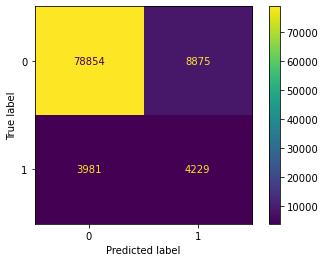

time: 2.8 s (started: 2022-05-07 02:39:37 +05:00)


In [30]:
lr = LogisticRegression( max_iter = 500)
lr.fit(x_smote, y_smote)
pred = lr.predict_proba(x_test_full)[:,1]
roc = roc_auc_score(y_test_full, pred)
print(roc)
pred1 = lr.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred1, labels = lr.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=lr.classes_)
display.plot()
plt.grid(False)
plt.show()

In [41]:
smote = SMOTE(random_state=2, sampling_strategy = 0.35)
x_smote, y_smote = smote.fit_resample(x_train_full, y_train_full)
x_smote.shape

(276335, 37)

time: 5.2 s (started: 2022-05-07 02:43:27 +05:00)


0.8376115682847864


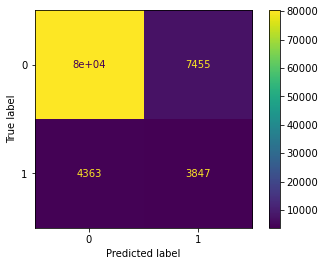

recall:  46.857490864799026
precision:  34.03822332330561
time: 2.23 s (started: 2022-05-07 03:41:05 +05:00)


In [44]:
lr = LogisticRegression( max_iter = 500)
lr.fit(x_smote, y_smote )
pred = lr.predict_proba(x_test_full)[:,1]
roc = roc_auc_score(y_test_full, pred)
print(roc)
pred1 = lr.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred1, labels = lr.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=lr.classes_)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

0.8379243074838942


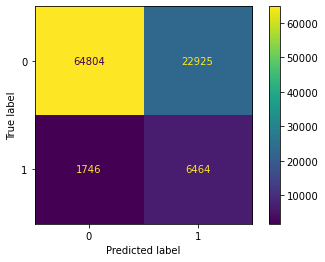

recall:  78.73325213154689
precision:  21.994623838851272
time: 2.31 s (started: 2022-05-07 03:43:11 +05:00)


In [45]:
lr = LogisticRegression( max_iter = 500, class_weight='balanced')
lr.fit(x_smote, y_smote )
pred = lr.predict_proba(x_test_full)[:,1]
roc = roc_auc_score(y_test_full, pred)
print(roc)
pred1 = lr.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred1, labels = lr.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=lr.classes_)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.846
Test AUC-ROC %.3f %  0.8414549708547913


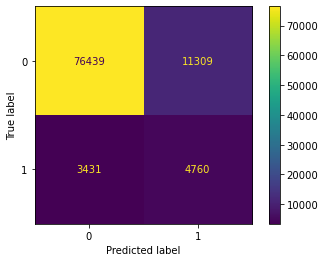

recall:  58.112562568672935
precision:  29.622254029497793
time: 29.7 s (started: 2022-05-07 19:43:03 +05:00)


In [44]:
model = lr = LogisticRegression()
parameters = {
    "model__max_iter": [500],
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

## BEST LOGISTIC REGRESSION MODEL WITH SMOTE

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.748
Test AUC-ROC %.3f %  0.8418854301794196


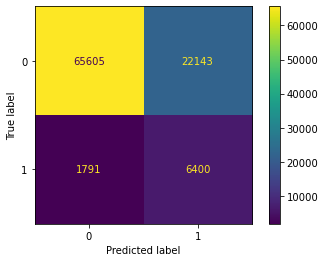

recall:  78.13453790745942
precision:  22.422310198647654
time: 34.3 s (started: 2022-05-07 21:37:51 +05:00)


In [46]:
model = lr = LogisticRegression(  class_weight= 'balanced')
parameters = {
    "model__max_iter": [500],

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

## 3.3. MODEL: KNN Classifier with SMOTE Train/Test Split

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.866
Test AUC-ROC %.3f %  0.830876405473556


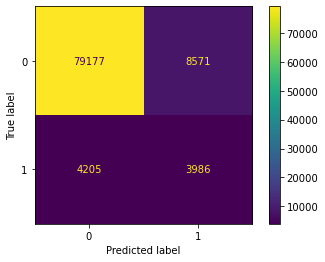

recall:  48.66316689048956
precision:  31.743250776459348
time: 4min 44s (started: 2022-05-07 18:49:39 +05:00)


In [24]:
model = knn = KNeighborsClassifier()
parameters = {
    "model__n_neighbors": [410]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.860
Test AUC-ROC %.3f %  0.8308888048836892


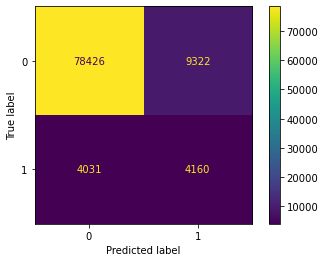

recall:  50.78744963984862
precision:  30.85595608960095
time: 4min 58s (started: 2022-05-07 18:54:24 +05:00)


In [25]:
model = knn = KNeighborsClassifier()
parameters = {
    "model__n_neighbors": [300]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.864
Test AUC-ROC %.3f %  0.8309824515956776


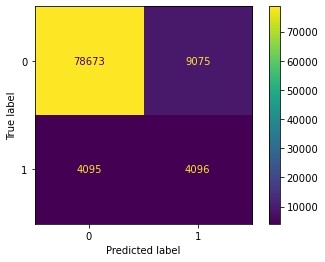

recall:  50.00610426077402
precision:  31.09862576873434
time: 4min 35s (started: 2022-05-07 19:04:10 +05:00)


In [27]:
model = knn = KNeighborsClassifier()
parameters = {
    "model__n_neighbors": [370]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

## BEST KNN With SMOTE

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.849
Test AUC-ROC %.3f %  0.8300490085015931


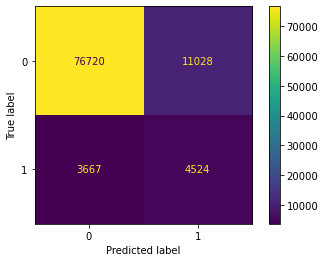

recall:  55.23135148333537
precision:  29.089506172839506
time: 4min 47s (started: 2022-05-07 18:59:22 +05:00)


In [26]:
model = knn = KNeighborsClassifier()
parameters = {
    "model__n_neighbors": [100]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


## 3.4. MODEL: Decision Tree Classifier with SMOTE Train/Test Split

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.768
Test AUC-ROC %.3f %  0.6771223097238306


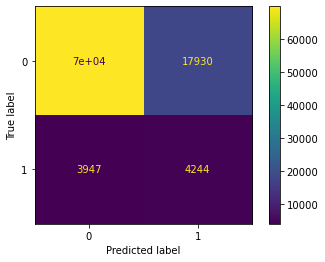

recall:  51.81296544988402
precision:  19.13953278614594
time: 27 s (started: 2022-05-07 19:09:12 +05:00)


In [29]:
model =dt = DecisionTreeClassifier()
parameters = {
    "model__min_samples_split": [4]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.752
Test AUC-ROC %.3f %  0.6580909508364668


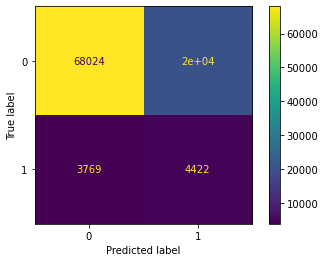

recall:  53.98608228543523
precision:  18.313592313426653
time: 27 s (started: 2022-05-07 19:09:39 +05:00)


In [30]:
model =dt = DecisionTreeClassifier()
parameters = {
    "model__min_samples_split": [2]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.759
Test AUC-ROC %.3f %  0.6593353037135059


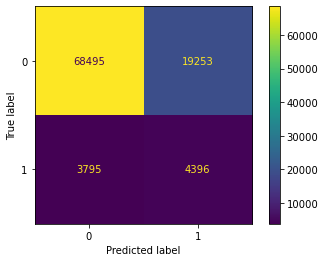

recall:  53.66866072518618
precision:  18.58852382764599
time: 26.3 s (started: 2022-05-07 19:10:06 +05:00)


In [31]:
model =dt = DecisionTreeClassifier()
parameters = {
    "model__max_features": ['sqrt']
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

## BEST DT MODEL WITH SMOTE

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.773
Test AUC-ROC %.3f %  0.6904057204422648


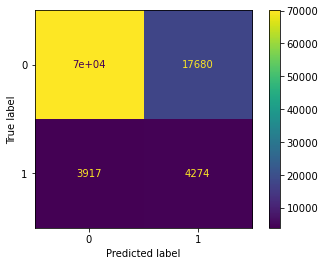

recall:  52.179221096325236
precision:  19.467978500501047
time: 26.8 s (started: 2022-05-07 19:08:46 +05:00)


In [28]:
model =dt = DecisionTreeClassifier()
parameters = {
    "model__min_samples_split": [6]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

## 3.5. MODEL: XGB Classifier with SMOTE Train/Test Split

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.837
Test AUC-ROC %.3f %  0.8347765987479702


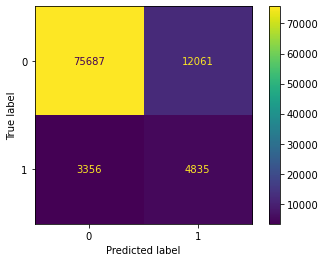

recall:  59.02820168477597
precision:  28.616240530303028
time: 50.9 s (started: 2022-05-07 19:11:24 +05:00)


In [33]:
model = XGB = XGBClassifier( random_state=2, verbosity=1, n_jobs = -1)
parameters = {
    "model__max_depth": [None]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.847
Test AUC-ROC %.3f %  0.8412147601097865


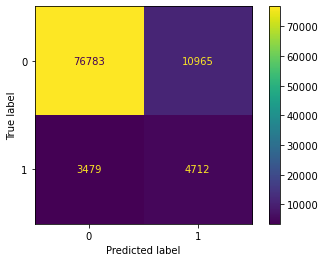

recall:  57.52655353436699
precision:  30.056771065892708
time: 51.8 s (started: 2022-05-07 19:12:15 +05:00)


In [34]:
model = XGB = XGBClassifier( random_state=2, verbosity=1, n_jobs = -1)
parameters = {
    "model__max_depth": [None],
    'model__learning_rate': [0.05]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.836
Test AUC-ROC %.3f %  0.8364772101262643


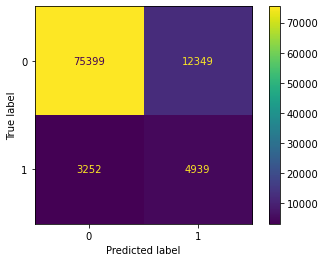

recall:  60.29788792577219
precision:  28.568949560388706
time: 4min 10s (started: 2022-05-07 19:13:06 +05:00)


In [35]:
model = XGB = XGBClassifier( random_state=2, verbosity=1, n_jobs = -1)
parameters = {
    "model__max_depth": [None],
    'model__learning_rate': [0.05],
    'model__n_estimators': [1000]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)



Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.832
Test AUC-ROC %.3f %  0.8294226706362662


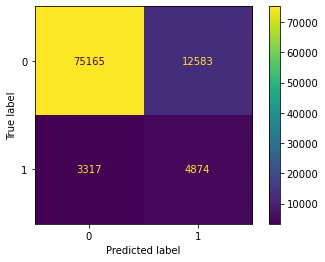

recall:  59.504334025149554
precision:  27.92003207882225
time: 4min 11s (started: 2022-05-07 19:17:17 +05:00)


In [36]:
model = XGB = XGBClassifier( random_state=2, verbosity=1, n_jobs = -1)
parameters = {
    "model__max_depth": [None],
    'model__learning_rate': [0.1],
    'model__n_estimators': [1000]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.824
Test AUC-ROC %.3f %  0.8196780608916444


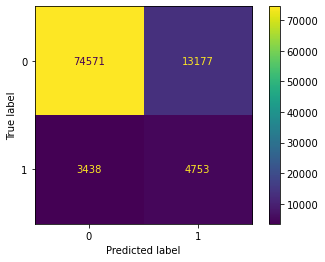

recall:  58.02710291783665
precision:  26.50864472950363
time: 4min 11s (started: 2022-05-07 19:21:28 +05:00)


In [37]:
model = XGB = XGBClassifier( random_state=2, verbosity=1, n_jobs = -1)
parameters = {
    "model__max_depth": [None],
    'model__learning_rate': [0.2],
    'model__n_estimators': [1000]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.818
Test AUC-ROC %.3f %  0.8086887963543643


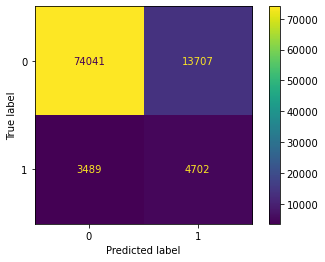

recall:  57.40446831888658
precision:  25.541854527676676
time: 4min 12s (started: 2022-05-07 19:38:51 +05:00)


In [43]:
model = XGB = XGBClassifier( random_state=2, verbosity=1, n_jobs = -1)
parameters = {
    "model__max_depth": [None],
    'model__learning_rate': [0.3],
    'model__n_estimators': [1000]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.835
Test AUC-ROC %.3f %  0.833921566061973


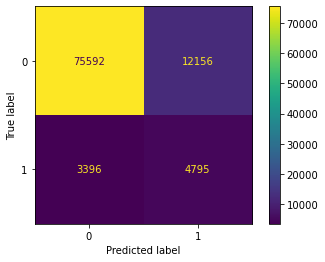

recall:  58.53986082285435
precision:  28.2874166715828
time: 2min 43s (started: 2022-05-07 19:29:51 +05:00)


In [39]:
model = XGB = XGBClassifier( random_state=2, verbosity=1, n_jobs = -1)
parameters = {
    "model__max_depth": [None],
    'model__learning_rate': [0.1],
    'model__n_estimators': [600]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.834
Test AUC-ROC %.3f %  0.8324941556231823


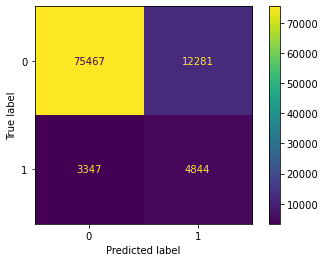

recall:  59.138078378708336
precision:  28.286131386861314
time: 3min 26s (started: 2022-05-07 19:34:33 +05:00)


In [41]:
model = XGB = XGBClassifier( random_state=2, verbosity=1, n_jobs = -1)
parameters = {
    "model__max_depth": [None],
    'model__learning_rate': [0.1],
    'model__n_estimators': [800]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.837
Test AUC-ROC %.3f %  0.8373592830429546


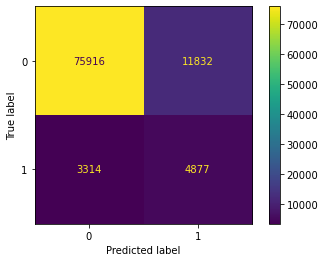

recall:  59.54095958979367
precision:  29.187862828415824
time: 1min 58s (started: 2022-05-07 19:32:34 +05:00)


In [40]:
model = XGB = XGBClassifier( random_state=2, verbosity=1, n_jobs = -1)
parameters = {
    "model__max_depth": [None],
    'model__learning_rate': [0.1],
    'model__n_estimators': [400]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)


## BEST XGB MODEL WITH SMOTE

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.843
Test AUC-ROC %.3f %  0.8420438308351593


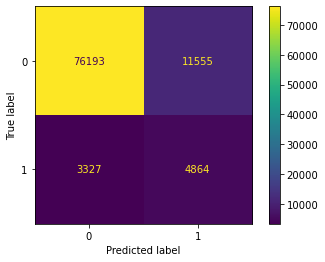

recall:  59.38224880966915
precision:  29.62421584749376
time: 51.5 s (started: 2022-05-07 19:37:59 +05:00)


In [42]:
model = XGB = XGBClassifier( random_state=2, verbosity=1, n_jobs = -1)
parameters = {
    "model__max_depth": [None],
    'model__learning_rate': [0.1],
    'model__n_estimators': [100]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

## 3.5. MODEL: RF Classifier with SMOTE Train/Test Split

In [ ]:
model = RandomForestClassifier()
parameters = {
    "model__max_depth":[20],
    "model__max_features":[5],
    "model__min_samples_leaf": [15],
    "model__min_samples_split": [15],
    "model__n_estimators":[1000]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
#scores = cross_val_score(pipeline, x_train_full, y_train_full, scoring='roc_auc', cv=cv, n_jobs=-10)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('ROC AUC: %.3f' % (clf.best_score_))

    Fitting 10 folds for each of 1 candidates, totalling 10 fits
    [CV 1/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=1000;, score=0.849 total time= 1.1min
    [CV 2/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=1000;, score=0.846 total time= 1.2min
    [CV 3/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=1000;, score=0.847 total time= 1.1min
    [CV 4/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=1000;, score=0.844 total time= 1.0min
    [CV 5/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=1000;, score=0.849 total time=  59.9s
    [CV 6/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=1000;, score=0.849 total time= 1.2min
    [CV 7/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=1000;, score=0.846 total time=  59.8s
    [CV 8/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=1000;, score=0.844 total time=  57.7s
    [CV 9/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=1000;, score=0.851 total time=  56.0s
    [CV 10/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=1000;, score=0.844 total time=  57.0s
   
     0.8469641079840636

In [ ]:
md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
md_auc

    0.840183238265902

In [ ]:
pred = clf.predict(x_test_full)
cm = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()
plt.grid(False)
plt.show()

TN = cm[0,0] 
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

recall = TP / (TP + FN)
specificity = TN / (TN + FP)
acc = (TP + TN) / (TP + FP + TN + FN)
Precision = TP / (TP + FP)

print("recall: ",recall)
print("specificity: ",specificity)
print("Precision: ",Precision)

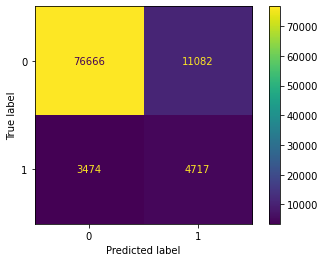

    recall:  0.5758759614210719
    specificity:  0.8737065232256006
    Precision:  0.29856320020254445

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END model__max_depth=100, model__max_features=sqrt, model__min_samples_leaf=50, model__min_samples_split=50, model__n_estimators=700;, score=0.839 total time=  29.6s
[CV 2/10] END model__max_depth=100, model__max_features=sqrt, model__min_samples_leaf=50, model__min_samples_split=50, model__n_estimators=700;, score=0.833 total time=  29.2s
[CV 3/10] END model__max_depth=100, model__max_features=sqrt, model__min_samples_leaf=50, model__min_samples_split=50, model__n_estimators=700;, score=0.834 total time=  29.6s
[CV 4/10] END model__max_depth=100, model__max_features=sqrt, model__min_samples_leaf=50, model__min_samples_split=50, model__n_estimators=700;, score=0.824 total time=  29.9s
[CV 5/10] END model__max_depth=100, model__max_features=sqrt, model__min_samples_leaf=50, model__min_samples_split=50, model__n_estimators=700;, score=0.833 total time=  29.8s
[CV 6/10] END model__max_depth=100, model__max_features=sqr

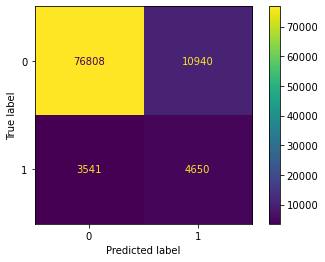

recall:  56.769625198388475
precision:  29.826812059012187


In [90]:
model = RandomForestClassifier()
parameters = {
    "model__max_depth":[100],
    "model__max_features":["sqrt"],
    "model__min_samples_leaf": [50],
    "model__min_samples_split": [50],
    "model__n_estimators":[700]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3, scoring = 'roc_auc')
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=100, model__min_samples_split=50, model__n_estimators=1000;, score=0.836 total time=  32.5s
[CV 2/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=100, model__min_samples_split=50, model__n_estimators=1000;, score=0.830 total time=  32.3s
[CV 3/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=100, model__min_samples_split=50, model__n_estimators=1000;, score=0.831 total time=  32.4s
[CV 4/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=100, model__min_samples_split=50, model__n_estimators=1000;, score=0.822 total time=  32.8s
[CV 5/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=100, model__min_samples_split=50, model__n_estimators=1000;, score=0.830 total time=  33.4s
[CV 6/10] END model__max_depth=20, model__max_features=5, model__min_

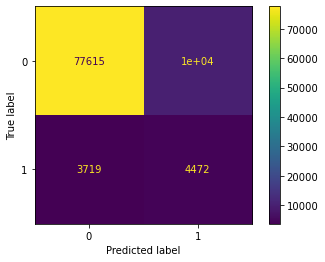

recall:  54.59650836283726
precision:  30.619650804519


In [91]:
model = RandomForestClassifier()
parameters = {
    "model__max_depth":[20],
    "model__max_features":[5],
    "model__min_samples_leaf": [100],
    "model__min_samples_split": [50],
    "model__n_estimators":[1000]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3, scoring = 'roc_auc')
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END model__max_depth=100, model__max_features=5, model__min_samples_leaf=100, model__min_samples_split=50, model__n_estimators=1000;, score=0.836 total time=  32.9s
[CV 2/10] END model__max_depth=100, model__max_features=5, model__min_samples_leaf=100, model__min_samples_split=50, model__n_estimators=1000;, score=0.830 total time=  35.9s
[CV 3/10] END model__max_depth=100, model__max_features=5, model__min_samples_leaf=100, model__min_samples_split=50, model__n_estimators=1000;, score=0.831 total time=  33.8s
[CV 4/10] END model__max_depth=100, model__max_features=5, model__min_samples_leaf=100, model__min_samples_split=50, model__n_estimators=1000;, score=0.821 total time=  33.5s
[CV 5/10] END model__max_depth=100, model__max_features=5, model__min_samples_leaf=100, model__min_samples_split=50, model__n_estimators=1000;, score=0.831 total time=  33.2s
[CV 6/10] END model__max_depth=100, model__max_features=5, model

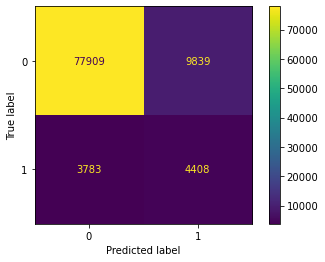

recall:  53.81516298376267
precision:  30.939846985330245


In [92]:
model = RandomForestClassifier()
parameters = {
    "model__max_depth":[100],
    "model__max_features":[5],
    "model__min_samples_leaf": [100],
    "model__min_samples_split": [50],
    "model__n_estimators":[1000]
    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3, scoring = 'roc_auc')
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

## BEST RF MODEL WITH SMOTE

In [66]:
model = RandomForestClassifier()
parameters = {
    "model__max_depth":[20],
    "model__max_features":[5],
    "model__min_samples_leaf": [15],
    "model__min_samples_split": [15],
    "model__n_estimators":[1000]
    }
over = SMOTE(random_state=2)
#under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
#scores = cross_val_score(pipeline, x_train_full, y_train_full, scoring='roc_auc', cv=cv, n_jobs=-10)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print((clf.best_score_))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=1000;, score=0.815 total time= 6.2min
[CV 2/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=1000;, score=0.819 total time= 6.2min
[CV 3/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=1000;, score=0.821 total time= 6.2min
[CV 4/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=1000;, score=0.815 total time= 6.4min
[CV 5/10] END model__max_depth=20, model__max_features=5, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=1000;, score=0.825 total time= 6.6min
[CV 6/10] END model__max_depth=20, model__max_features=5, model__min_sampl

In [67]:
md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
md_auc

0.8328917631892756

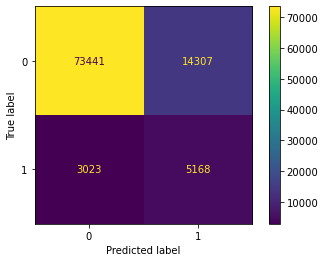

recall:  0.6309363936027347
specificity:  0.836953548798833
Precision:  0.2653658536585366


In [68]:
pred = clf.predict(x_test_full)
cm = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()
plt.grid(False)
plt.show()

TN = cm[0,0] 
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

recall = TP / (TP + FN)
specificity = TN / (TN + FP)
acc = (TP + TN) / (TP + FP + TN + FN)
Precision = TP / (TP + FP)

print("recall: ",recall)
print("specificity: ",specificity)
print("Precision: ",Precision)

# 4.1. Stacking Classifier With SMOTE

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END .................................., score=0.833 total time= 3.7min
[CV 2/10] END .................................., score=0.830 total time= 3.5min
[CV 3/10] END .................................., score=0.835 total time= 3.6min
[CV 4/10] END .................................., score=0.832 total time= 3.4min
[CV 5/10] END .................................., score=0.836 total time= 3.6min
[CV 6/10] END .................................., score=0.834 total time= 3.6min
[CV 7/10] END .................................., score=0.837 total time= 3.6min
[CV 8/10] END .................................., score=0.833 total time= 3.6min
[CV 9/10] END .................................., score=0.838 total time= 3.6min
[CV 10/10] END ................................., score=0.832 total time= 3.6min
Train ROC AUC: 0.834
Test AUC-ROC %.3f %  0.8428510996353988


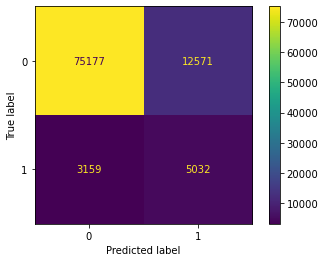

recall:  61.43328042973996
precision:  28.58603647105607


In [105]:
clf6 = LogisticRegression(class_weight= 'balanced')
clf3 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 1000,   n_jobs = -1)
# clf4 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
model = vc = StackingClassifier(estimators = [('lr', clf6), ('xgb3', clf3)],
                       n_jobs = -1, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

In [ ]:
clf6 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
clf3 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.05)
clf4 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.1, n_estimators = 1000,   n_jobs = -1)
clf5 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
model = vc = StackingClassifier(estimators = [('lr', clf6), ('gb', clf3), ('xgb', clf4),('rf', clf5) ],n_jobs = -1, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

    Fitting 10 folds for each of 1 candidates, totalling 10 fits
    [CV 1/10] END .................................., score=0.834 total time= 9.4min
    [CV 2/10] END .................................., score=0.831 total time= 9.2min
    [CV 3/10] END .................................., score=0.835 total time= 9.2min
    [CV 4/10] END .................................., score=0.832 total time= 9.2min
    [CV 5/10] END .................................., score=0.837 total time= 9.3min
    [CV 6/10] END .................................., score=0.834 total time= 9.2min
    [CV 7/10] END .................................., score=0.837 total time= 9.2min
    [CV 8/10] END .................................., score=0.832 total time= 9.1min
    [CV 9/10] END .................................., score=0.841 total time= 9.1min
    [CV 10/10] END ................................., score=0.831 total time= 9.2min
    Train ROC AUC: 0.834
    Test AUC-ROC %.3f %  0.8436965315438351
   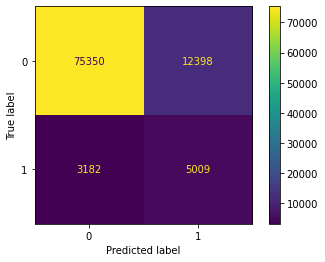
    recall:  61.152484434135026
    precision:  28.77577985867754

In [ ]:
clf1 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
clf2 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 1000,   n_jobs = -1)
clf3 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
model = vc = StackingClassifier(estimators = [('lr', clf1), ('xgb', clf2), ('rf', clf3)],
                      n_jobs = -1, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

    Fitting 10 folds for each of 1 candidates, totalling 10 fits
    [CV 1/10] END .................................., score=0.833 total time= 6.5min
    [CV 2/10] END .................................., score=0.833 total time= 6.4min
    [CV 3/10] END .................................., score=0.835 total time= 6.4min
    [CV 4/10] END .................................., score=0.834 total time= 6.4min
    [CV 5/10] END .................................., score=0.836 total time= 6.4min
    [CV 6/10] END .................................., score=0.835 total time= 6.5min
    [CV 7/10] END .................................., score=0.835 total time= 6.5min
    [CV 8/10] END .................................., score=0.831 total time= 6.5min
    [CV 9/10] END .................................., score=0.840 total time= 6.5min
    [CV 10/10] END ................................., score=0.834 total time= 6.5min
    Train ROC AUC: 0.835
    Test AUC-ROC %.3f %  0.8435725249206578
   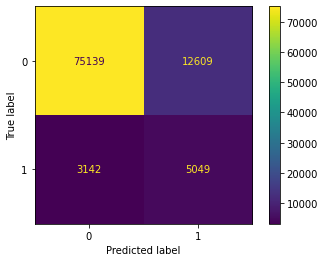
    recall:  61.64082529605665
    precision:  28.593272171253826

## BEST STACKING MODEL WITH SMOTE

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    1.8s finished


[CV 1/10] END .................................., score=0.834 total time=12.8min


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.7min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.2min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.7min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.7min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    2.0s finished


[CV 2/10] END .................................., score=0.831 total time=12.8min


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.7min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.8min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    1.9s finished


[CV 3/10] END .................................., score=0.836 total time=12.6min


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.8min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.2min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    1.8s finished


[CV 4/10] END .................................., score=0.832 total time=12.8min


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    1.8s finished


[CV 5/10] END .................................., score=0.837 total time=12.2min


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    1.8s finished


[CV 6/10] END .................................., score=0.836 total time=12.2min


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    1.7s finished


[CV 7/10] END .................................., score=0.836 total time=12.3min


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    1.8s finished


[CV 8/10] END .................................., score=0.832 total time=12.3min


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    1.7s finished


[CV 9/10] END .................................., score=0.840 total time=12.3min


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    1.8s finished


[CV 10/10] END ................................., score=0.835 total time=12.3min


[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.8min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.3min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.9min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:  2.8min finished
[Parallel(n_jobs=-10)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-10)]: Done   5 out of   5 | elapsed:    2.5s finished


Train ROC AUC: 0.835
Test AUC-ROC %.3f %  0.8438860065516413


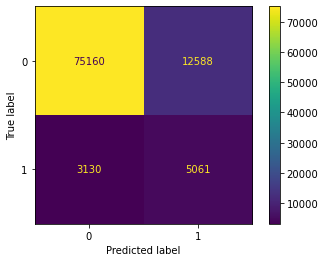

recall:  61.78732755463313
precision:  28.67584565697773


In [102]:
clf1 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
clf2 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.1, n_estimators = 1000,   n_jobs = -1)
clf9 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 13, min_samples_split = 13)
clf10 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 17, min_samples_split = 17)
clf11 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
# clf3 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.05)
# clf4 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
model = vc = StackingClassifier(estimators = [('rf1', clf1), ('rf2', clf2), ('rf9', clf9),('rf10', clf10), ('lr1', clf11)],
                       n_jobs = -10, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

# 4.2. Voting Classifier With SMOTE

In [ ]:
clf1 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 900,   n_jobs = -1)
clf2 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 1100,   n_jobs = -1)
clf3 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 1000,   n_jobs = -1)
clf4 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.1, n_estimators = 1000,   n_jobs = -1)
clf5 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.2, n_estimators = 1000,   n_jobs = -1)
clf6 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
# clf3 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.05)
# clf4 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
model = vc = VotingClassifier(estimators = [('xgb1', clf1), ('xgb2', clf2), ('xgb3', clf3),('xgb4', clf4),('xgb5', clf5),('lr', clf6) ],
                      voting = 'soft', n_jobs = -1, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

    Fitting 10 folds for each of 1 candidates, totalling 10 fits
    [CV 1/10] END .................................., score=0.824 total time= 2.8min
    [CV 2/10] END .................................., score=0.821 total time= 2.8min
    [CV 3/10] END .................................., score=0.826 total time= 2.7min
    [CV 4/10] END .................................., score=0.821 total time= 3.0min
    [CV 5/10] END .................................., score=0.831 total time= 2.8min
    [CV 6/10] END .................................., score=0.823 total time= 2.5min
    [CV 7/10] END .................................., score=0.824 total time= 2.4min
    [CV 8/10] END .................................., score=0.825 total time= 2.4min
    [CV 9/10] END .................................., score=0.827 total time= 2.4min
    [CV 10/10] END ................................., score=0.825 total time= 2.7min
    Train ROC AUC: 0.824
    Test AUC-ROC %.3f %  0.837810701850746
   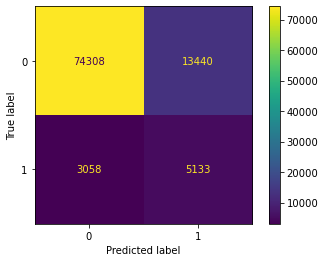
    recall:  62.66634110609205
    precision:  27.636892262962366

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.823
Test AUC-ROC %.3f %  0.8438226195760741


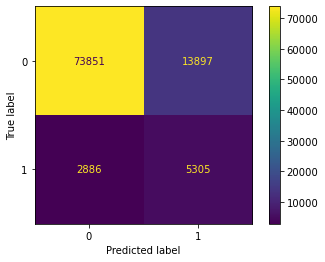

recall:  64.76620681235502
precision:  27.627330486407665
time: 8min 28s (started: 2022-05-08 01:06:43 +05:00)


In [68]:
clf1 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
clf2 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 1000,   n_jobs = -1)
clf3 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.05)
clf4 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
model = vc = VotingClassifier(estimators = [('lr', clf1), ('xgb', clf2), ('gb', clf3),('rf', clf4)],
                      voting = 'soft', n_jobs = -1, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.816
Test AUC-ROC %.3f %  0.8428471872541945


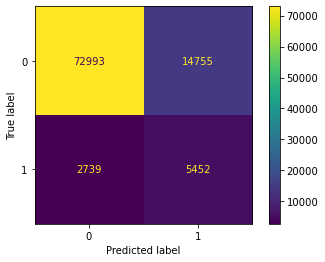

recall:  66.56085947991699
precision:  26.98074924531103
time: 6min 35s (started: 2022-05-08 01:16:17 +05:00)


In [69]:
clf1 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
clf2 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 1000,   n_jobs = -1)
clf3 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.05)
# clf4 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
model = vc = VotingClassifier(estimators = [('lr', clf1), ('xgb', clf2), ('gb', clf3)],
                      voting = 'soft', n_jobs = -1, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.835
Test AUC-ROC %.3f %  0.8341734395151736


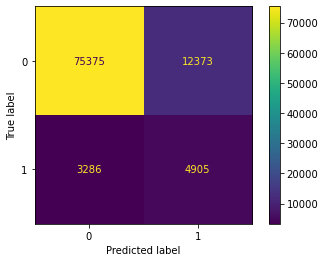

recall:  59.88279819313881
precision:  28.38870239611066
time: 19min 10s (started: 2022-05-08 01:32:17 +05:00)


In [71]:
# clf1 = LogisticRegression(class_weight= 'balanced', max_iter = 500)

clf1 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 900,   n_jobs = -1)
clf2 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 1100,   n_jobs = -1)
clf3 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 1000,   n_jobs = -1)
clf4 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.1, n_estimators = 1000,   n_jobs = -1)
clf5 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.2, n_estimators = 1000,   n_jobs = -1)
# clf6 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
# clf3 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.05)
# clf4 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
model = vc = VotingClassifier(estimators = [('xgb1', clf1), ('xgb2', clf2), ('xgb3', clf3),('xgb4', clf4),('xgb5', clf5)],
                      voting = 'soft', n_jobs = -1, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.842
Test AUC-ROC %.3f %  0.8425720106456617


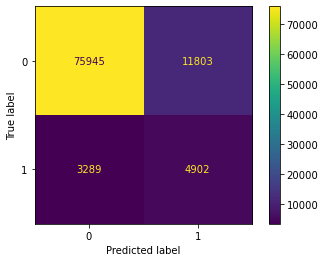

recall:  59.846172628494685
precision:  29.344507632445378
time: 11min 37s (started: 2022-05-08 01:57:41 +05:00)


In [72]:
# clf1 = LogisticRegression(class_weight= 'balanced', max_iter = 500)

clf1 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.05)
clf2 =  GradientBoostingClassifier(n_estimators = 200 , max_depth = 5, learning_rate = 0.05)
clf3 =  GradientBoostingClassifier(n_estimators = 150 , max_depth = 5, learning_rate = 0.05)
clf4 =  GradientBoostingClassifier(n_estimators = 300 , max_depth = 5, learning_rate = 0.05)
clf5 = GradientBoostingClassifier(n_estimators = 350 , max_depth = 5, learning_rate = 0.05)
clf6 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 4, learning_rate = 0.05)
clf7 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 6, learning_rate = 0.05)
clf8 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.10)
clf9 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.15)
clf10 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.20)

# clf6 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
# clf3 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.05)
# clf4 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
model = vc = VotingClassifier(estimators = [('gb1', clf1), ('gb2', clf2), ('gb3', clf3),('gb4', clf4),('gb5', clf5),('gb6', clf6), ('gb7', clf7), ('gb8', clf8),('gb9', clf9),('gb10', clf10)],
                      voting = 'soft', n_jobs = -1, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.830
Test AUC-ROC %.3f %  0.8431407521935199


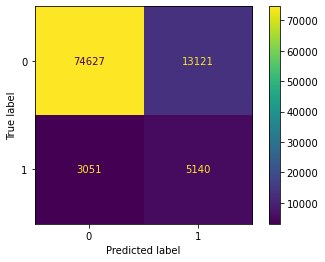

recall:  62.75180075692833
precision:  28.147417994633372
time: 12min 8s (started: 2022-05-08 02:14:11 +05:00)


In [73]:
# clf1 = LogisticRegression(class_weight= 'balanced', max_iter = 500)

clf1 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.05)
clf2 =  GradientBoostingClassifier(n_estimators = 200 , max_depth = 5, learning_rate = 0.05)
clf3 =  GradientBoostingClassifier(n_estimators = 150 , max_depth = 5, learning_rate = 0.05)
clf4 =  GradientBoostingClassifier(n_estimators = 300 , max_depth = 5, learning_rate = 0.05)
clf5 = GradientBoostingClassifier(n_estimators = 350 , max_depth = 5, learning_rate = 0.05)
clf6 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 4, learning_rate = 0.05)
clf7 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 6, learning_rate = 0.05)
clf8 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.10)
clf9 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.15)
clf10 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.20)

clf11 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
clf12 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
# clf3 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.05)
# clf4 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
model = vc = VotingClassifier(estimators = [('gb1', clf1), ('gb2', clf2), ('gb3', clf3),('gb4', clf4),('gb5', clf5),('gb6', clf6), ('gb7', clf7), ('gb8', clf8),('gb9', clf9),('gb10', clf10), ('lr1', clf11), ('lr2', clf12)],
                      voting = 'soft', n_jobs = -1, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.832
Test AUC-ROC %.3f %  0.8423675059444125


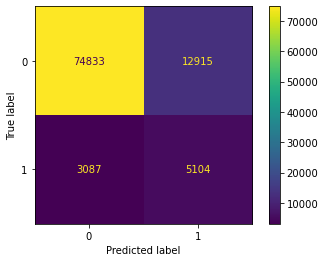

recall:  62.31229398119888
precision:  28.325656251734284
time: 25min 12s (started: 2022-05-08 02:26:21 +05:00)


In [74]:
# clf1 = LogisticRegression(class_weight= 'balanced', max_iter = 500)

clf1 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
clf2 =  RandomForestClassifier(n_estimators = 900 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
clf3 =  RandomForestClassifier(n_estimators = 800 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
clf4 =  RandomForestClassifier(n_estimators = 1100 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
clf5 = RandomForestClassifier(n_estimators = 1000 , max_depth = 17, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
clf6 = RandomForestClassifier(n_estimators = 1000 , max_depth = 23, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
clf7 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 3, min_samples_leaf = 15, min_samples_split = 15)
clf8 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 7, min_samples_leaf = 15, min_samples_split = 15)
clf9 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 13, min_samples_split = 13)
clf10 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 17, min_samples_split = 17)

clf11 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
clf12 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
# clf3 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.05)
# clf4 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
model = vc = VotingClassifier(estimators = [('rf1', clf1), ('rf2', clf2), ('rf3', clf3),('rf4', clf4),('rf5', clf5),('rf6', clf6), ('rf7', clf7), ('rf8', clf8),('rf9', clf9),('rf10', clf10), ('lr1', clf11), ('lr2', clf12)],
                      voting = 'soft', n_jobs = -1, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.842
Test AUC-ROC %.3f %  0.8429206988378787


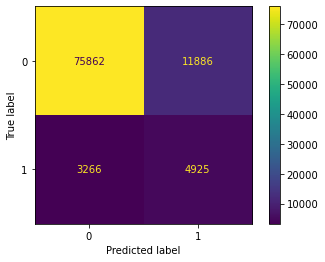

recall:  60.12696862409962
precision:  29.296294093153293
time: 42min 33s (started: 2022-05-08 03:41:04 +05:00)


In [80]:
clf1 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 900,   n_jobs = -1)
clf2 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 1100,   n_jobs = -1)
clf3 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 1000,   n_jobs = -1)

clf4 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.05)
clf5 =  GradientBoostingClassifier(n_estimators = 200 , max_depth = 5, learning_rate = 0.05)
clf6 =  GradientBoostingClassifier(n_estimators = 300 , max_depth = 5, learning_rate = 0.05)
clf7 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 4, learning_rate = 0.05)
clf8 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 6, learning_rate = 0.05)
                                  
clf9 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
clf10 = LogisticRegression( max_iter = 500)                                 

clf11 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
clf12 =  RandomForestClassifier(n_estimators = 900 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
clf13 =  RandomForestClassifier(n_estimators = 1100 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
clf14 = RandomForestClassifier(n_estimators = 1000 , max_depth = 17, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
clf15 = RandomForestClassifier(n_estimators = 1000 , max_depth = 23, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
clf16 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 3, min_samples_leaf = 15, min_samples_split = 15)
clf17 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 7, min_samples_leaf = 15, min_samples_split = 15)
clf18 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 13, min_samples_split = 13)
clf19 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 17, min_samples_split = 17)


# clf3 = GradientBoostingClassifier(n_estimators = 250 , max_depth = 5, learning_rate = 0.05)
# clf4 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
model = vc = VotingClassifier(estimators = [('xgb1', clf1), ('xgb2', clf2), ('xgb3', clf3), ('gb1', clf4),
                                            ('gb2', clf5) , ('gb3', clf6), ('gb4', clf7), ('gb5', clf8),
                                            ('lr1', clf9), ('lr2', clf10), ('rf1', clf11), ('rf2', clf12),
                                            ('rf3', clf13) , ('rf4', clf14), ('rf5', clf15), ('rf6', clf16),
                                            ('rf7', clf17), ('rf8', clf18), ('rf9', clf19)],
                      voting = 'soft', n_jobs = -1, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

## 2ND BEST VOTING CLASSIFIER MODEL

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.800
Test AUC-ROC %.3f %  0.8424440923369381


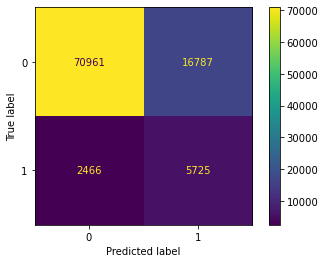

recall:  69.89378586253204
precision:  25.43088130774698
time: 5min 31s (started: 2022-05-08 01:22:53 +05:00)


In [70]:
clf1 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
clf2 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 1000,   n_jobs = -1)
model = vc = VotingClassifier(estimators = [('lr', clf1), ('xgb', clf2)],
                      voting = 'soft', n_jobs = -1, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

## BEST VOTING CLASSIFIER MODEL WITH SMOTE

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Train ROC AUC: 0.815
Test AUC-ROC %.3f %  0.8436250248468207


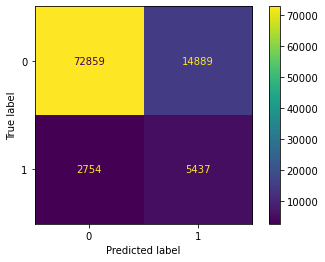

recall:  66.37773165669637
precision:  26.74899143953557
time: 7min 31s (started: 2022-05-08 04:24:52 +05:00)


In [81]:
clf1 = LogisticRegression(class_weight= 'balanced', max_iter = 500)
clf2 = XGBClassifier( random_state=2, verbosity=1, learning_rate = 0.05, n_estimators = 1000,   n_jobs = -1)
clf3 = RandomForestClassifier(n_estimators = 1000 , max_depth = 20, max_features = 5, min_samples_leaf = 15, min_samples_split = 15)
model = vc = VotingClassifier(estimators = [('lr', clf1), ('xgb', clf2), ('rf', clf3)],
                      voting = 'soft', n_jobs = -1, verbose = True)


parameters = {

    }
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)





cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

clf = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-10, verbose =3)
clf.fit(x_train_full, y_train_full)
print('Train ROC AUC: %.3f' % (clf.best_score_))

md_probs = clf.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = clf.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

# 4.3. Neural Networks With SMOTE

In [84]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

time: 4.44 s (started: 2022-05-08 04:37:24 +05:00)


Epoch 1/200
1919/1919 [==============================] - 2s 785us/step - loss: 0.5464 - auc_9: 0.7567
Epoch 2/200
1919/1919 [==============================] - 2s 791us/step - loss: 0.4851 - auc_9: 0.8187
Epoch 3/200
1919/1919 [==============================] - 2s 797us/step - loss: 0.4721 - auc_9: 0.8299
Epoch 4/200
1919/1919 [==============================] - 2s 805us/step - loss: 0.4673 - auc_9: 0.8338
Epoch 5/200
1919/1919 [==============================] - 2s 848us/step - loss: 0.4649 - auc_9: 0.8357
Epoch 6/200
1919/1919 [==============================] - 2s 849us/step - loss: 0.4636 - auc_9: 0.8368
Epoch 7/200
1919/1919 [==============================] - 2s 906us/step - loss: 0.4624 - auc_9: 0.8376
Epoch 8/200
1919/1919 [==============================] - 2s 886us/step - loss: 0.4617 - auc_9: 0.8382
Epoch 9/200
1919/1919 [==============================] - 2s 883us/step - loss: 0.4610 - auc_9: 0.8388
Epoch 10/200
1919/1919 [==============================] - 2s 898us/step - loss: 0.

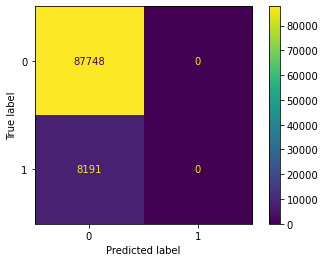

recall:  0.0
precision:  nan
time: 5min 25s (started: 2022-05-08 04:59:47 +05:00)


In [96]:

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
x_smote, y_smote = over.fit_resample(x_train_full, y_train_full)
x_smote_under, y_smote_under = under.fit_resample(x_smote, y_smote)

model =Sequential([
    Dense(units=30, activation='relu'),
    Dense(units=12, activation='relu'),
    Dense(units=1)
    ])
model.compile(loss= tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='sgd', metrics=[tf.keras.metrics.AUC(from_logits=True)])

model.fit(x_smote_under, y_smote_under, epochs=200, verbose = 1)


md_probs = model.predict(x_test_full)
print(md_probs)
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = model.predict(x_test_full)

classes_x=np.argmax(pred,axis=1)
confusion = confusion_matrix(y_test_full, classes_x)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

Epoch 1/500
1919/1919 [==============================] - 2s 817us/step - loss: 0.5516 - auc_10: 0.7462
Epoch 2/500
1919/1919 [==============================] - 2s 823us/step - loss: 0.4818 - auc_10: 0.8223
Epoch 3/500
1919/1919 [==============================] - 2s 825us/step - loss: 0.4684 - auc_10: 0.8333
Epoch 4/500
1919/1919 [==============================] - 2s 820us/step - loss: 0.4641 - auc_10: 0.8367
Epoch 5/500
1919/1919 [==============================] - 2s 831us/step - loss: 0.4621 - auc_10: 0.8381
Epoch 6/500
1919/1919 [==============================] - 2s 824us/step - loss: 0.4607 - auc_10: 0.8392
Epoch 7/500
1919/1919 [==============================] - 2s 824us/step - loss: 0.4598 - auc_10: 0.8399
Epoch 8/500
1919/1919 [==============================] - 2s 833us/step - loss: 0.4592 - auc_10: 0.8405
Epoch 9/500
1919/1919 [==============================] - 2s 830us/step - loss: 0.4584 - auc_10: 0.8410
Epoch 10/500
1919/1919 [==============================] - 2s 841us/step -

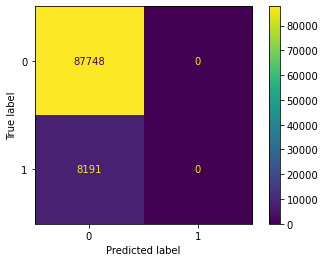

recall:  0.0
precision:  nan
time: 13min 48s (started: 2022-05-08 05:05:12 +05:00)


In [97]:

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
x_smote, y_smote = over.fit_resample(x_train_full, y_train_full)
x_smote_under, y_smote_under = under.fit_resample(x_smote, y_smote)

model =Sequential([
    Dense(units=30, activation='relu'),
    Dense(units=12, activation='relu'),
    Dense(units=1)
    ])
model.compile(loss= tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='sgd', metrics=[tf.keras.metrics.AUC(from_logits=True)])

model.fit(x_smote_under, y_smote_under, epochs=500, verbose = 1)


md_probs = model.predict(x_test_full)
print(md_probs)
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = model.predict(x_test_full)

classes_x=np.argmax(pred,axis=1)
confusion = confusion_matrix(y_test_full, classes_x)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

In [103]:
y_train_full.value_counts()

HeartDisease
0               204674
1                19182
dtype: int64

time: 0 ns (started: 2022-05-08 05:20:28 +05:00)


In [ ]:
weight_for_0 = (1 / 204674) * (223856 / 2.0)
weight_for_1 = (1 / 19182) * (223856 / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}


model =Sequential([
    Dense(units=50, activation='relu'),
    Dense(units=35, activation='relu'),
    Dense(units=25, activation='relu'),
    Dense(units=20, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=10, activation='relu'),
    Dense(units=1)
    ])
model.compile(loss= tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='sgd', metrics=[tf.keras.metrics.AUC(from_logits=True)])

model.fit(x_train_full, y_train_full, epochs=2000, verbose = 1, class_weight=class_weight)


md_probs = model.predict(x_test_full)
print(md_probs)
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC %.3f % ', md_auc)

pred = model.predict(x_test_full)

classes_x=np.argmax(pred,axis=1)
confusion = confusion_matrix(y_test_full, classes_x)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

Epoch 1/2000
6996/6996 [==============================] - 9s 1ms/step - loss: 0.5252 - auc_27: 0.8154
Epoch 2/2000
6996/6996 [==============================] - 9s 1ms/step - loss: 0.4954 - auc_27: 0.8381
Epoch 3/2000
6996/6996 [==============================] - 8s 1ms/step - loss: 0.4933 - auc_27: 0.8396
Epoch 4/2000
6996/6996 [==============================] - 8s 1ms/step - loss: 0.4917 - auc_27: 0.8406
Epoch 5/2000
5069/6996 [====================>.........] - ETA: 2s - loss: 0.4915 - auc_27: 0.8400

## MODEL RESULTS

In [45]:
data = [['KNN without SMOTE', 'N_neighbors = 410', 0.834, 1, 73], 
        
        ['GB without SMOTE', 'n_est = 1000, learning_rate = 0.05', 0.8415, 9, 54],
        
        ['RF without SMOTE', 'depth=20, features=5, min_samples_leaf/split=15, n_est =1000', 0.8397 , 3.3, 61], 
        
        ['KNN with SMOTE', 'N_neighbors = 100', 0.8300, 55.23, 29.09],
        
        ['GB with SMOTE', 'n_est = 250, learning_rate = 0.05, depth = 5', 0.842, 59.58, 29.27],
        
        ['Logistic Reg with SMOTE', 'class_weight= balanced', 0.8418, 78.13, 22.42],
        
        ['RF with SMOTE', 'depth=20, features=5, min_samples_leaf/split=15, n_est =1000', 0.8329, 63.09, 26.53],
        
        ['DT with SMOTE', 'min_samples_split = 6', 0.69, 52.17, 19.46],
        
        ['XGB with SMOTE', 'n_est = 100, learning_rate = 0.1', 0.8420, 59.38, 29.62],
    
        ['Stacking with SMOTE', '5 models', 0.8438, 61.78, 28.67],
        
        ['Voting with SMOTE', '3 models', 0.8436, 66.37, 26.74]
       ]
model_results = pd.DataFrame(data, columns = ['Model Name', 'Winner Parameters', 'ROC-AUC Test', 'Recall (%)', 'Precision (%)'])
model_results

,Model Name,Winner Parameters,ROC-AUC Test,Recall (%),Precision (%)
0,KNN without SMOTE,N_neighbors = 410,0.8340,1.00,73.00
1,GB without SMOTE,"n_est = 1000, learning_rate = 0.05",0.8415,9.00,54.00
2,RF without SMOTE,"depth=20, features=5, min_samples_leaf/split=1...",0.8397,3.30,61.00
3,KNN with SMOTE,N_neighbors = 100,0.8300,55.23,29.09
4,GB with SMOTE,"n_est = 250, learning_rate = 0.05, depth = 5",0.8420,59.58,29.27
5,Logistic Reg with SMOTE,class_weight= balanced,0.8418,78.13,22.42
6,RF with SMOTE,"depth=20, features=5, min_samples_leaf/split=1...",0.8329,63.09,26.53
7,DT with SMOTE,min_samples_split = 6,0.6900,52.17,19.46
8,XGB with SMOTE,"n_est = 100, learning_rate = 0.1",0.8420,59.38,29.62
9,Stacking with SMOTE,5 models,0.8438,61.78,28.67
